In [1]:
# imported libs
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, PolynomialFeatures, PowerTransformer, FunctionTransformer
from sklearn.cluster import DBSCAN, KMeans, AgglomerativeClustering

from datetime import datetime, timedelta


# local imports
import wrangle as w
import summarize as s

# ignore warning
import warnings
warnings.filterwarnings('ignore')

# Exploration Working Notebook

# Generate dataframes and split data for exploration

In [2]:
train, val, test, train_scaled, val_scaled, test_scaled, new_df, df_customers, df = w.wrangle_data()

In [3]:
# checking for subset shape
train.shape, val.shape, test.shape

((234509, 19), (50252, 19), (50253, 19))

# Cleaned & Prepped DataFrame

In [4]:
# cleaned dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 335014 entries, 0 to 541908
Data columns (total 19 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   invoice_no            335014 non-null  object        
 1   stock_code            335014 non-null  object        
 2   description           335014 non-null  object        
 3   quantity              335014 non-null  int64         
 4   invoice_date          335014 non-null  datetime64[ns]
 5   unit_price            335014 non-null  float64       
 6   customer_id           335014 non-null  object        
 7   country               335014 non-null  object        
 8   total_price           335014 non-null  float64       
 9   invoice_date_day      335014 non-null  object        
 10  invoice_date_time     335014 non-null  object        
 11  invoice_year          335014 non-null  int32         
 12  invoice_month         335014 non-null  int32         
 13  invo

In [5]:
# Checking for nulls
df.isnull().sum()

invoice_no              0
stock_code              0
description             0
quantity                0
invoice_date            0
unit_price              0
customer_id             0
country                 0
total_price             0
invoice_date_day        0
invoice_date_time       0
invoice_year            0
invoice_month           0
invoice_month_name      0
invoice_day             0
invoice_day_name        0
invoice_day_of_week     0
invoice_week_of_year    0
invoice_hour            0
dtype: int64

In [6]:
df.head(1)

invoice_no stock_code                         description  quantity  \
0     536365     85123A  WHITE HANGING HEART T-LIGHT HOLDER         6   

         invoice_date  unit_price customer_id         country  total_price  \
0 2010-12-01 08:26:00        2.55       17850  United Kingdom         15.3   

  invoice_date_day invoice_date_time  invoice_year  invoice_month  \
0       2010-12-01          08:26:00          2010             12   

  invoice_month_name  invoice_day invoice_day_name  invoice_day_of_week  \
0           December            1        Wednesday                    2   

   invoice_week_of_year  invoice_hour  
0                    48             8

# Aggregated and groupedby dataframe


In [7]:
new_df

new_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4188 entries, 12347 to 18287
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   invoice_date  4188 non-null   int64  
 1   invoice_no    4188 non-null   int64  
 2   total_price   4188 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 130.9+ KB


In [8]:
s.summarize(train)

Shape of Data: 
(234509, 19)
Info: 
<class 'pandas.core.frame.DataFrame'>
Index: 234509 entries, 298159 to 212465
Data columns (total 19 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   invoice_no            234509 non-null  object        
 1   stock_code            234509 non-null  object        
 2   description           234509 non-null  object        
 3   quantity              234509 non-null  int64         
 4   invoice_date          234509 non-null  datetime64[ns]
 5   unit_price            234509 non-null  float64       
 6   customer_id           234509 non-null  object        
 7   country               234509 non-null  object        
 8   total_price           234509 non-null  float64       
 9   invoice_date_day      234509 non-null  object        
 10  invoice_date_time     234509 non-null  object        
 11  invoice_year          234509 non-null  int32         
 12  invoice_month         

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 234509 entries, 298159 to 212465
Data columns (total 19 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   invoice_no            234509 non-null  object        
 1   stock_code            234509 non-null  object        
 2   description           234509 non-null  object        
 3   quantity              234509 non-null  int64         
 4   invoice_date          234509 non-null  datetime64[ns]
 5   unit_price            234509 non-null  float64       
 6   customer_id           234509 non-null  object        
 7   country               234509 non-null  object        
 8   total_price           234509 non-null  float64       
 9   invoice_date_day      234509 non-null  object        
 10  invoice_date_time     234509 non-null  object        
 11  invoice_year          234509 non-null  int32         
 12  invoice_month         234509 non-null  int32         
 13 

In [10]:
train.invoice_month_name.value_counts()

invoice_month_name
November     39333
October      29705
December     25959
September    23732
May          16159
March        15776
August       15714
June         15701
July         15569
April        13199
January      12188
February     11474
Name: count, dtype: int64

In [11]:
month_counts = train.invoice_month_name.value_counts()

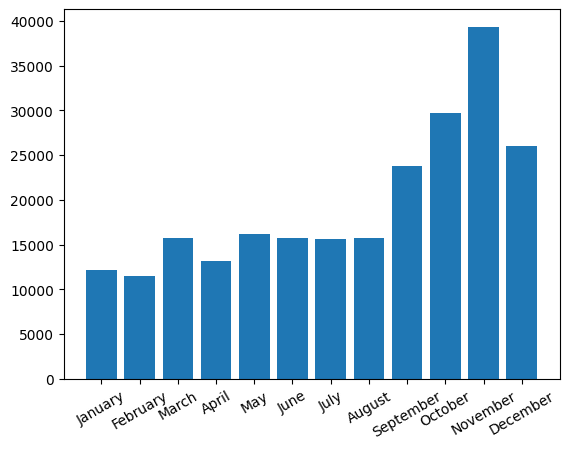

In [12]:
month_order = ["January", "February", "March", "April", "May", "June", 
               "July", "August", "September", "October", "November", "December"]

# Sort the month counts according to the specified order
sorted_month_counts = month_counts.reindex(month_order)

# Plot the bar chart
plt.bar(x=sorted_month_counts.index, height=sorted_month_counts.values)
plt.xticks(rotation=30)
plt.show()


In [13]:
train.invoice_day_name.value_counts()

invoice_day_name
Thursday     46284
Wednesday    39916
Sunday       38958
Tuesday      38919
Monday       38364
Friday       32068
Name: count, dtype: int64

In [14]:
train.invoice_month_name

298159      August
312774      August
466189    November
213460        June
314832      August
            ...   
208208         May
424709     October
228289        June
254499        July
212465        June
Name: invoice_month_name, Length: 234509, dtype: object

In [15]:
train.head(3)

invoice_no stock_code                     description  quantity  \
298159     562984      22137  BATHROOM SET LOVE HEART DESIGN         4   
312774     564372      23352   ROLL WRAP 50'S RED CHRISTMAS         12   
466189     576321      22597  MUSICAL ZINC HEART DECORATION          5   

              invoice_date  unit_price customer_id         country  \
298159 2011-08-11 11:45:00        2.95       17841  United Kingdom   
312774 2011-08-25 09:55:00        1.25       12714          France   
466189 2011-11-14 14:59:00        0.29       14953  United Kingdom   

        total_price invoice_date_day invoice_date_time  invoice_year  \
298159        11.80       2011-08-11          11:45:00          2011   
312774        15.00       2011-08-25          09:55:00          2011   
466189         1.45       2011-11-14          14:59:00          2011   

        invoice_month invoice_month_name  invoice_day invoice_day_name  \
298159              8             August           11         Thursday   
312774              8             August           25         Thursday   
466189             11           November           14           Monday   

        invoice_day_of_week  invoice_week_of_year  invoice_hour  
298159                    3                    32            11  
312774                    3                    34             9  
466189                    0                    46            14

In [16]:
train.describe().T

count                           mean  \
quantity              234509.0                        7.49529   
invoice_date            234509  2011-07-12 21:36:00.153000448   
unit_price            234509.0                       2.185667   
total_price           234509.0                      12.768859   
invoice_year          234509.0                    2010.934356   
invoice_month         234509.0                        7.67461   
invoice_day           234509.0                       15.02205   
invoice_day_of_week   234509.0                       2.642214   
invoice_week_of_year  234509.0                      31.228396   
invoice_hour          234509.0                      12.770845   

                                      min                  25%  \
quantity                              1.0                  2.0   
invoice_date          2010-12-01 08:26:00  2011-04-08 11:26:00   
unit_price                          0.001                 1.25   
total_price                         0.001                  3.8   
invoice_year                       2010.0               2011.0   
invoice_month                         1.0                  5.0   
invoice_day                           1.0                  7.0   
invoice_day_of_week                   0.0                  1.0   
invoice_week_of_year                  1.0                 19.0   
invoice_hour                          7.0                 11.0   

                                      50%                  75%  \
quantity                              6.0                 12.0   
invoice_date          2011-08-03 15:28:00  2011-10-23 15:29:00   
unit_price                           1.65                 2.95   
total_price                         10.08                 17.4   
invoice_year                       2011.0               2011.0   
invoice_month                         9.0                 11.0   
invoice_day                          15.0                 22.0   
invoice_day_of_week                   3.0                  4.0   
invoice_week_of_year                 35.0                 44.0   
invoice_hour                         13.0                 14.0   

                                      max        std  
quantity                             27.0   6.778269  
invoice_date          2011-12-09 12:50:00        NaN  
unit_price                            7.5   1.541768  
total_price                         178.8  13.173552  
invoice_year                       2011.0   0.247658  
invoice_month                        12.0   3.409903  
invoice_day                          31.0    8.64954  
invoice_day_of_week                   6.0   1.951991  
invoice_week_of_year                 51.0   14.72379  
invoice_hour                         20.0   2.251673

In [17]:
train[['quantity', 'unit_price', 'total_price']].head()

quantity  unit_price  total_price
298159         4        2.95        11.80
312774        12        1.25        15.00
466189         5        0.29         1.45
213460         4        6.25        25.00
314832        10        1.65        16.50

In [18]:
train_scaled.shape, val_scaled.shape, test_scaled.shape

((234509, 19), (50252, 19), (50253, 19))

In [19]:
train_scaled.head(3)

invoice_no stock_code                     description  quantity  \
298159     562984      22137  BATHROOM SET LOVE HEART DESIGN  0.115385   
312774     564372      23352   ROLL WRAP 50'S RED CHRISTMAS   0.423077   
466189     576321      22597  MUSICAL ZINC HEART DECORATION   0.153846   

              invoice_date  unit_price customer_id         country  \
298159 2011-08-11 11:45:00    0.393252       17841  United Kingdom   
312774 2011-08-25 09:55:00    0.166556       12714          France   
466189 2011-11-14 14:59:00    0.038538       14953  United Kingdom   

        total_price invoice_date_day invoice_date_time  invoice_year  \
298159     0.065990       2011-08-11          11:45:00           1.0   
312774     0.083887       2011-08-25          09:55:00           1.0   
466189     0.008104       2011-11-14          14:59:00           1.0   

        invoice_month invoice_month_name  invoice_day invoice_day_name  \
298159       0.636364             August     0.333333         Thursday   
312774       0.636364             August     0.800000         Thursday   
466189       0.909091           November     0.433333           Monday   

        invoice_day_of_week  invoice_week_of_year  invoice_hour  
298159                  0.5                  0.62      0.307692  
312774                  0.5                  0.66      0.153846  
466189                  0.0                  0.90      0.538462

In [20]:
train_scaled.info()

<class 'pandas.core.frame.DataFrame'>
Index: 234509 entries, 298159 to 212465
Data columns (total 19 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   invoice_no            234509 non-null  object        
 1   stock_code            234509 non-null  object        
 2   description           234509 non-null  object        
 3   quantity              234509 non-null  float64       
 4   invoice_date          234509 non-null  datetime64[ns]
 5   unit_price            234509 non-null  float64       
 6   customer_id           234509 non-null  object        
 7   country               234509 non-null  object        
 8   total_price           234509 non-null  float64       
 9   invoice_date_day      234509 non-null  object        
 10  invoice_date_time     234509 non-null  object        
 11  invoice_year          234509 non-null  float64       
 12  invoice_month         234509 non-null  float64       
 13 

In [21]:
train_scaled.describe().T

count                           mean  \
quantity              234509.0                       0.249819   
invoice_date            234509  2011-07-12 21:36:00.153000448   
unit_price            234509.0                       0.291328   
total_price           234509.0                       0.071409   
invoice_year          234509.0                       0.934356   
invoice_month         234509.0                       0.606783   
invoice_day           234509.0                       0.467402   
invoice_day_of_week   234509.0                       0.440369   
invoice_week_of_year  234509.0                       0.604568   
invoice_hour          234509.0                       0.443911   

                                      min                  25%  \
quantity                              0.0             0.038462   
invoice_date          2010-12-01 08:26:00  2011-04-08 11:26:00   
unit_price                            0.0             0.166556   
total_price                           0.0             0.021247   
invoice_year                          0.0                  1.0   
invoice_month                         0.0             0.363636   
invoice_day                           0.0                  0.2   
invoice_day_of_week                   0.0             0.166667   
invoice_week_of_year                  0.0                 0.36   
invoice_hour                          0.0             0.307692   

                                      50%                  75%  \
quantity                         0.192308             0.423077   
invoice_date          2011-08-03 15:28:00  2011-10-23 15:29:00   
unit_price                       0.219896             0.393252   
total_price                      0.056371              0.09731   
invoice_year                          1.0                  1.0   
invoice_month                    0.727273             0.909091   
invoice_day                      0.466667                  0.7   
invoice_day_of_week                   0.5             0.666667   
invoice_week_of_year                 0.68                 0.86   
invoice_hour                     0.461538             0.538462   

                                      max       std  
quantity                              1.0  0.260703  
invoice_date          2011-12-09 12:50:00       NaN  
unit_price                            1.0  0.205597  
total_price                           1.0  0.073678  
invoice_year                          1.0  0.247658  
invoice_month                         1.0  0.309991  
invoice_day                           1.0  0.288318  
invoice_day_of_week                   1.0  0.325332  
invoice_week_of_year                  1.0  0.294476  
invoice_hour                          1.0  0.173206

In [22]:
train_scaled.columns.to_list()

['invoice_no',
 'stock_code',
 'description',
 'quantity',
 'invoice_date',
 'unit_price',
 'customer_id',
 'country',
 'total_price',
 'invoice_date_day',
 'invoice_date_time',
 'invoice_year',
 'invoice_month',
 'invoice_month_name',
 'invoice_day',
 'invoice_day_name',
 'invoice_day_of_week',
 'invoice_week_of_year',
 'invoice_hour']

In [23]:
train_scaled.head(3)  

invoice_no stock_code                     description  quantity  \
298159     562984      22137  BATHROOM SET LOVE HEART DESIGN  0.115385   
312774     564372      23352   ROLL WRAP 50'S RED CHRISTMAS   0.423077   
466189     576321      22597  MUSICAL ZINC HEART DECORATION   0.153846   

              invoice_date  unit_price customer_id         country  \
298159 2011-08-11 11:45:00    0.393252       17841  United Kingdom   
312774 2011-08-25 09:55:00    0.166556       12714          France   
466189 2011-11-14 14:59:00    0.038538       14953  United Kingdom   

        total_price invoice_date_day invoice_date_time  invoice_year  \
298159     0.065990       2011-08-11          11:45:00           1.0   
312774     0.083887       2011-08-25          09:55:00           1.0   
466189     0.008104       2011-11-14          14:59:00           1.0   

        invoice_month invoice_month_name  invoice_day invoice_day_name  \
298159       0.636364             August     0.333333         Thursday   
312774       0.636364             August     0.800000         Thursday   
466189       0.909091           November     0.433333           Monday   

        invoice_day_of_week  invoice_week_of_year  invoice_hour  
298159                  0.5                  0.62      0.307692  
312774                  0.5                  0.66      0.153846  
466189                  0.0                  0.90      0.538462

## New features below based on features present:

In [24]:
train.total_price.value_counts()

total_price
15.00     13852
17.70      6401
10.20      5603
19.80      5302
1.25       5251
          ...  
102.80        1
20.94         1
17.76         1
57.60         1
11.97         1
Name: count, Length: 1068, dtype: int64

In [25]:
train.total_price.head()

298159    11.80
312774    15.00
466189     1.45
213460    25.00
314832    16.50
Name: total_price, dtype: float64

## Can we see patterns, find signals in the data?

## What features are driving the outcome?

## Are there other features we can construct that have stronger relationships?

## Visualization and statistical testing

## I want to walk away from exploration with with modeling strategies (feature selection, algorithm selection, evaluation methods, etc.).

## Lets take a look at the distributions of all features in the data

## What is the distribution of numerical features?

Cannot create histogram. The data type of invoice_no is not numeric.
Cannot create histogram. The data type of stock_code is not numeric.
Cannot create histogram. The data type of description is not numeric.


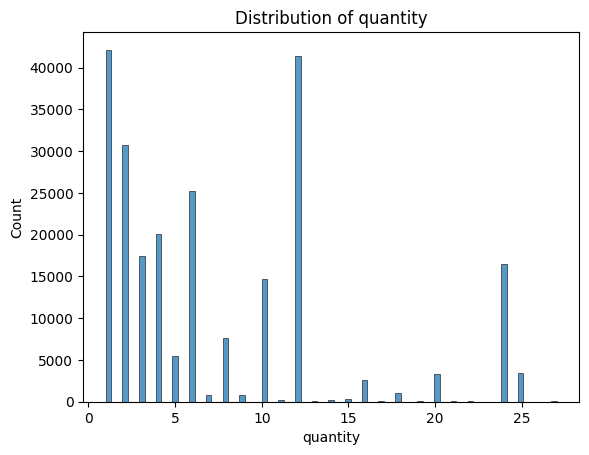

Cannot create histogram. The data type of invoice_date is not numeric.


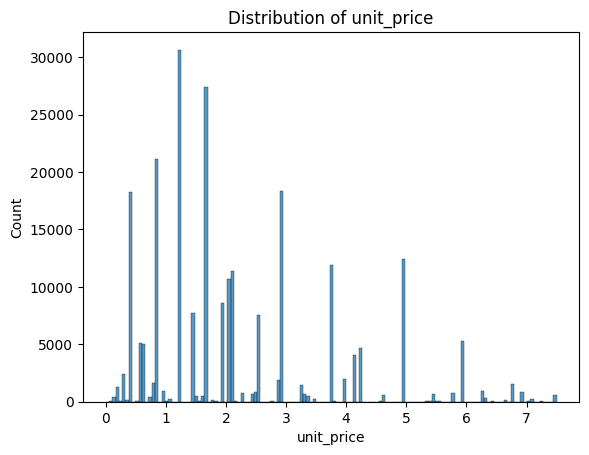

Cannot create histogram. The data type of customer_id is not numeric.
Cannot create histogram. The data type of country is not numeric.


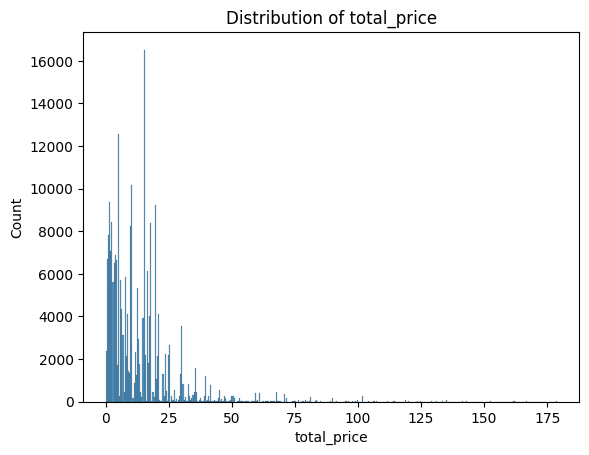

Cannot create histogram. The data type of invoice_date_day is not numeric.
Cannot create histogram. The data type of invoice_date_time is not numeric.


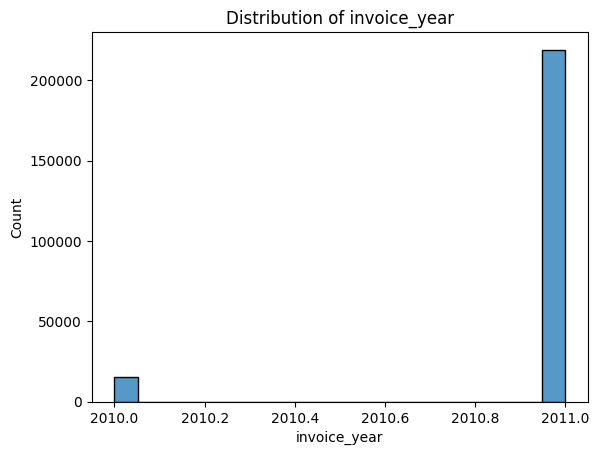

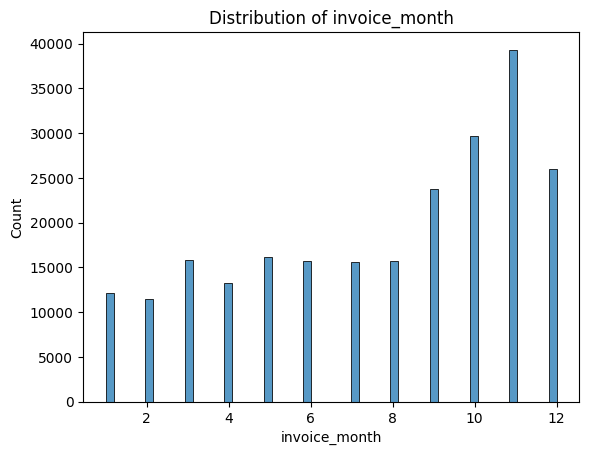

Cannot create histogram. The data type of invoice_month_name is not numeric.


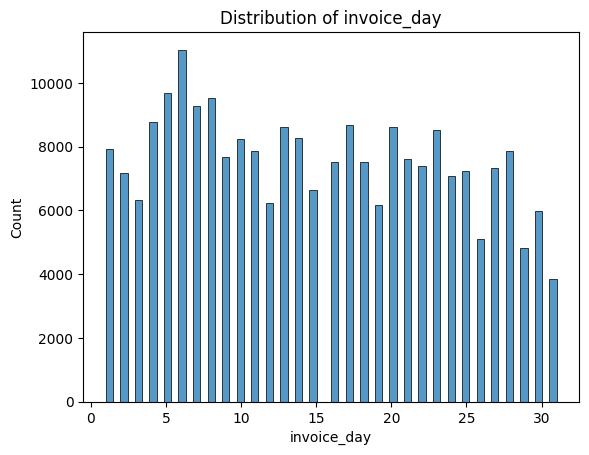

Cannot create histogram. The data type of invoice_day_name is not numeric.


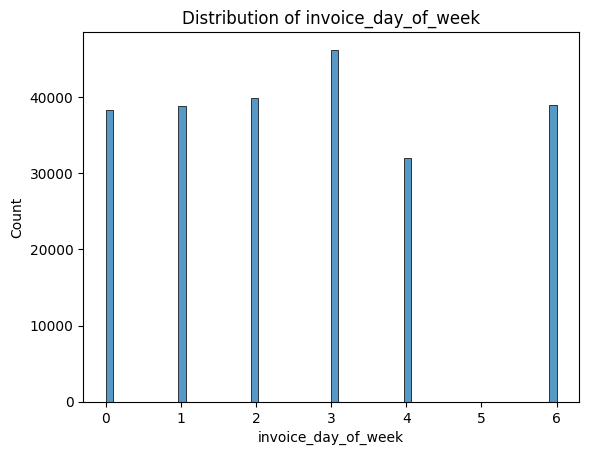

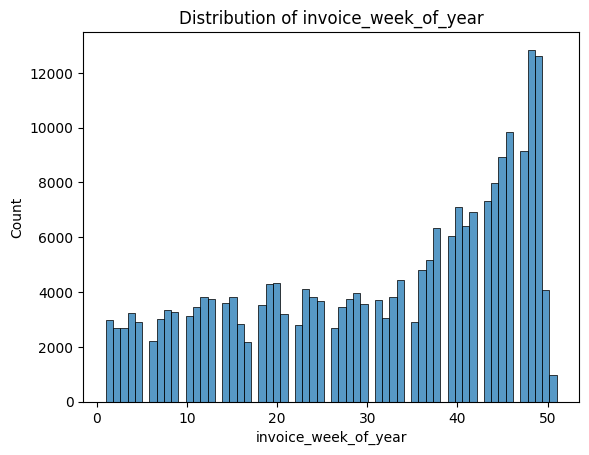

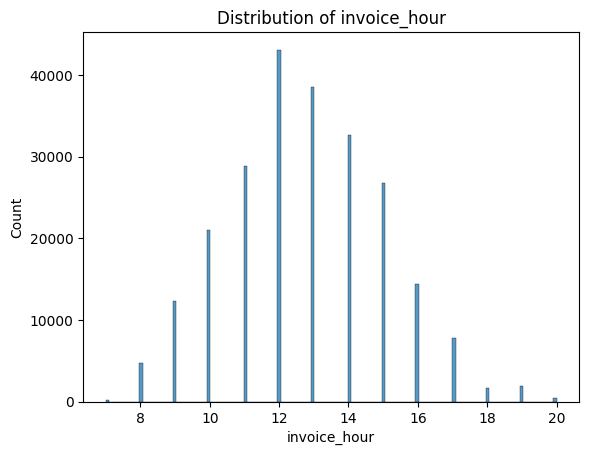

In [59]:
col = train.columns.tolist()

# Loop through each column in the list
for col_name in col:
    # Check the data type of the current column
    if train[col_name].dtype.kind in 'biufc':
        # Create histogram if the data type is numeric
        plt.figure()
        plt.title(f'Distribution of {col_name}')
        sns.histplot(data=train, x=col_name)
        plt.show()
    else:
        print(f"Cannot create histogram. The data type of {col_name} is not numeric.")

# now let's view with MinMaxScaling...

Cannot create histogram. The data type of invoice_no is not numeric.
Cannot create histogram. The data type of stock_code is not numeric.
Cannot create histogram. The data type of description is not numeric.


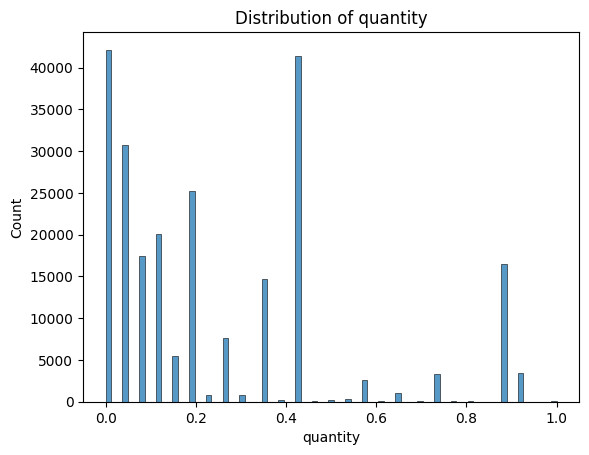

Cannot create histogram. The data type of invoice_date is not numeric.


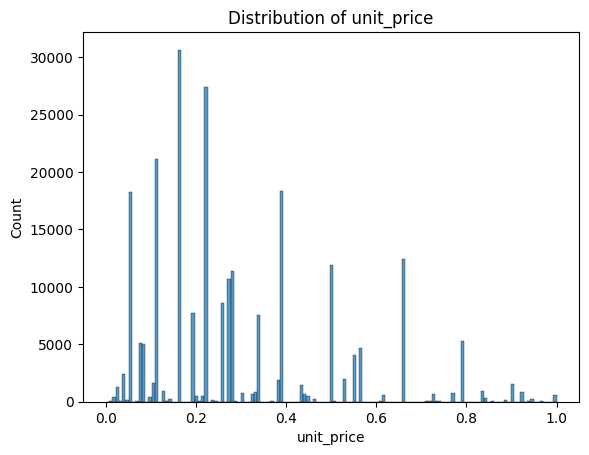

Cannot create histogram. The data type of customer_id is not numeric.
Cannot create histogram. The data type of country is not numeric.


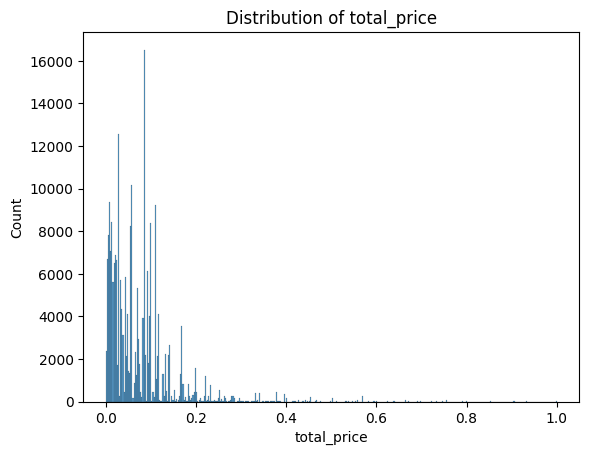

Cannot create histogram. The data type of invoice_date_day is not numeric.
Cannot create histogram. The data type of invoice_date_time is not numeric.


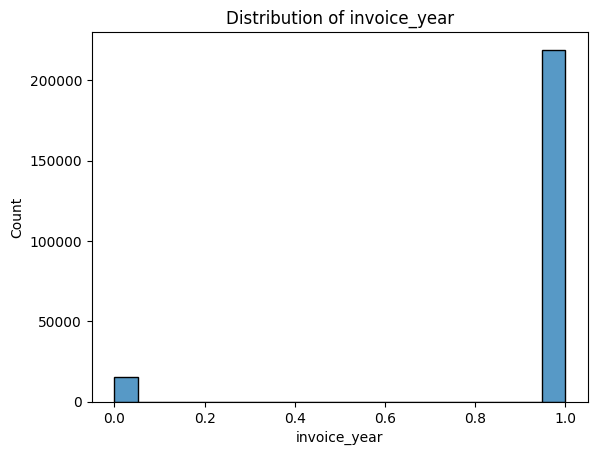

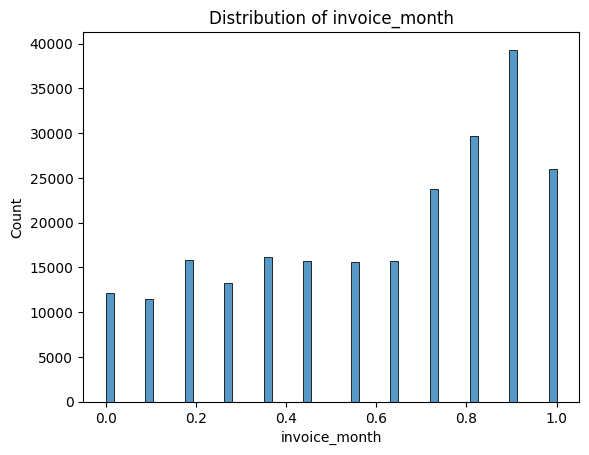

Cannot create histogram. The data type of invoice_month_name is not numeric.


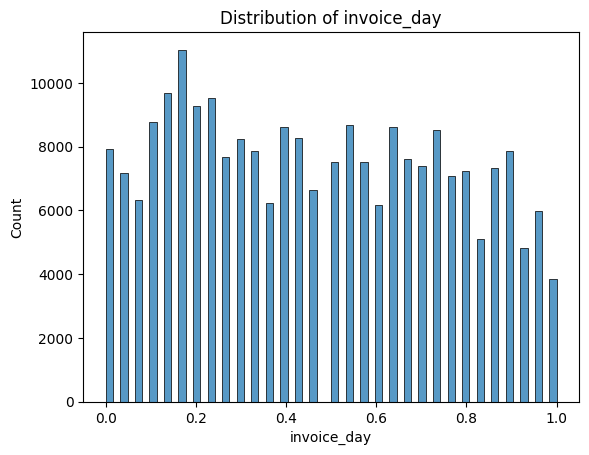

Cannot create histogram. The data type of invoice_day_name is not numeric.


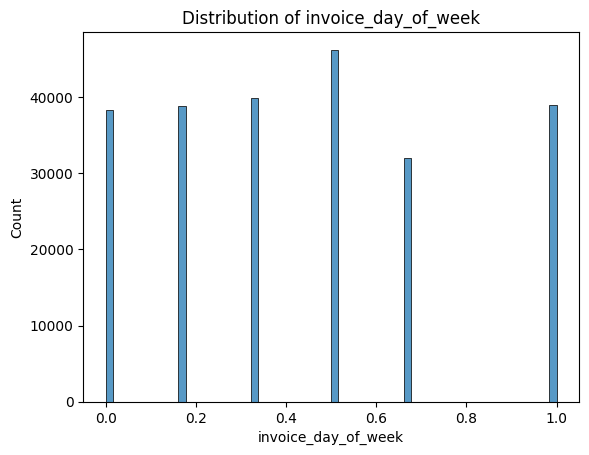

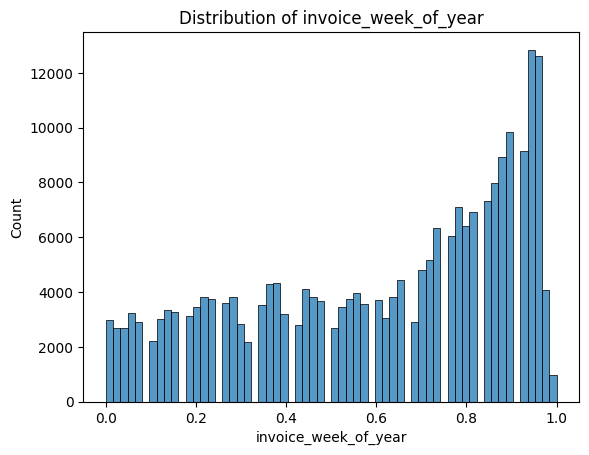

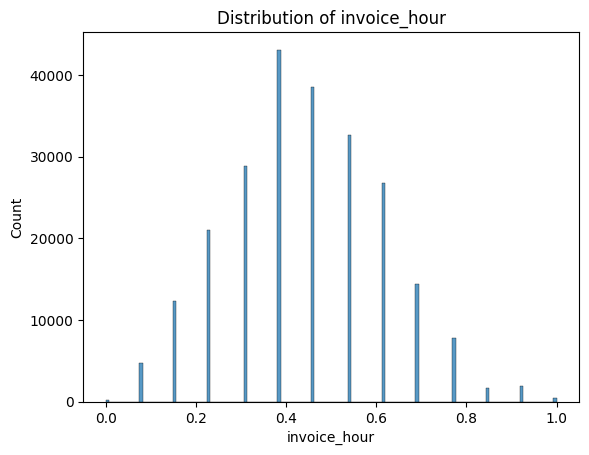

In [60]:
col = train_scaled.columns.tolist()

# Loop through each column in the list
for col_name in col:
    # Check the data type of the current column
    if train_scaled[col_name].dtype.kind in 'biufc':
        # Create histogram if the data type is numeric
        plt.figure()
        plt.title(f'Distribution of {col_name}')
        sns.histplot(data=train_scaled, x=col_name)
        plt.show()
    else:
        print(f"Cannot create histogram. The data type of {col_name} is not numeric.")

## Categorical data

## What is the distribution of categorical features?

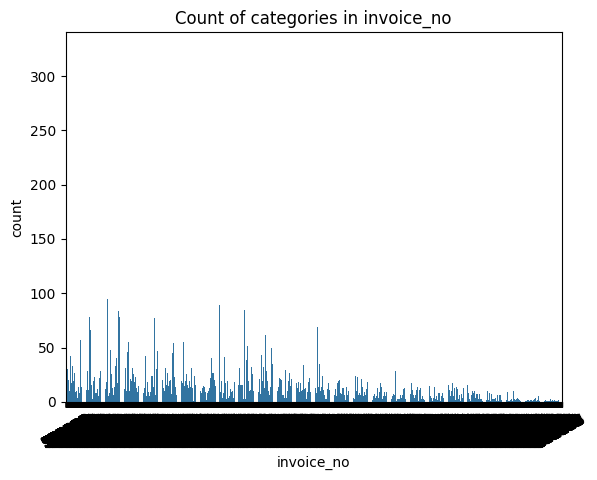

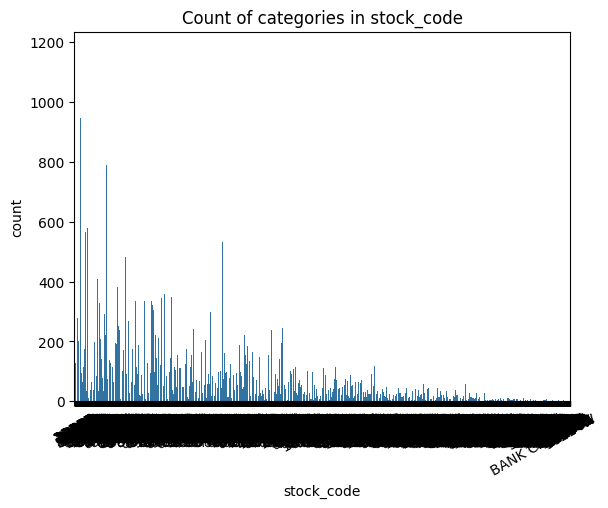

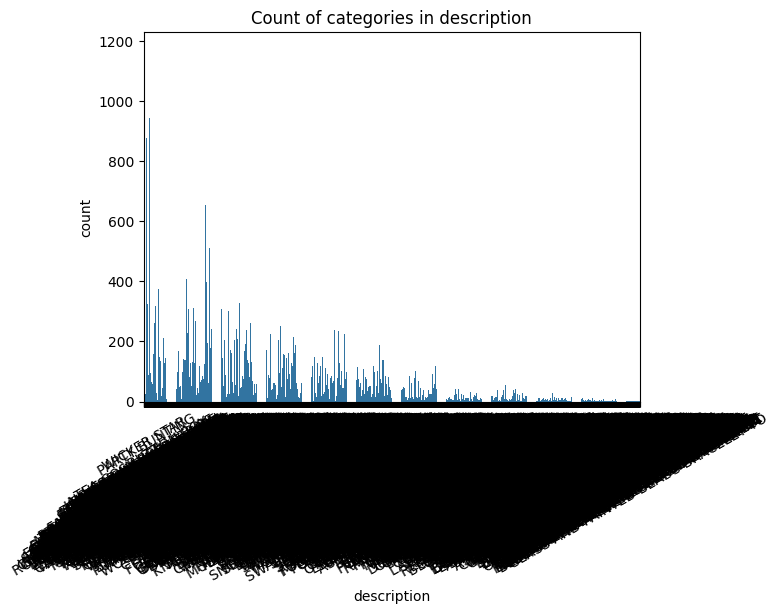

Cannot create countplot. The data type of quantity is numeric.


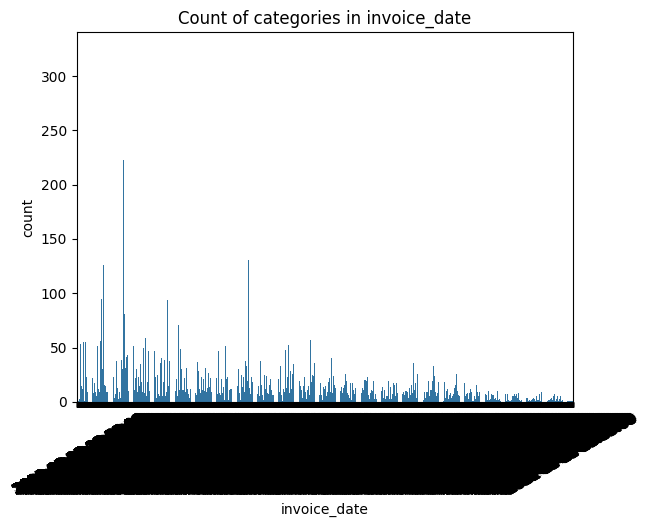

Cannot create countplot. The data type of unit_price is numeric.


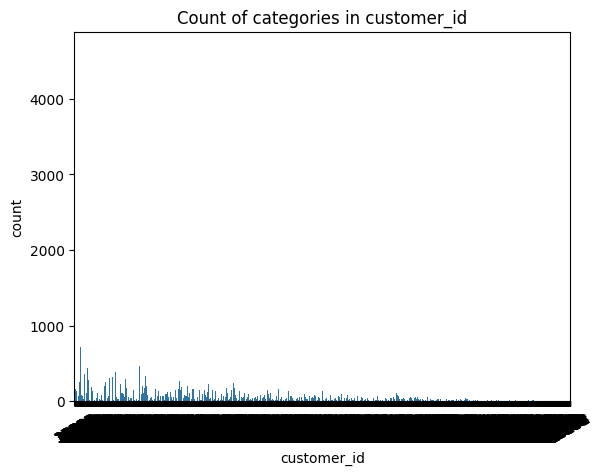

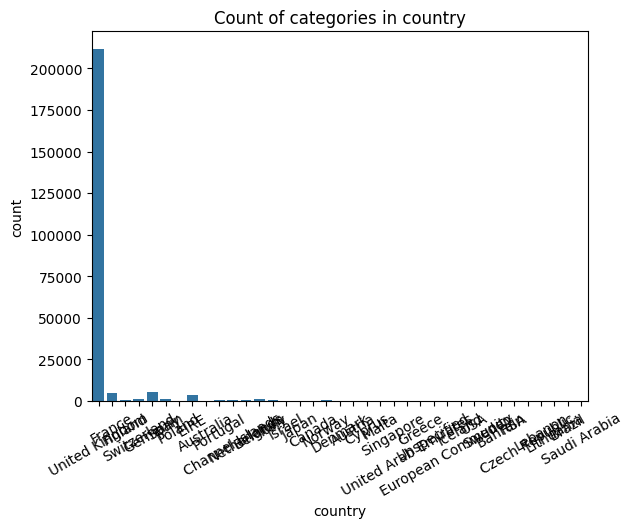

Cannot create countplot. The data type of total_price is numeric.


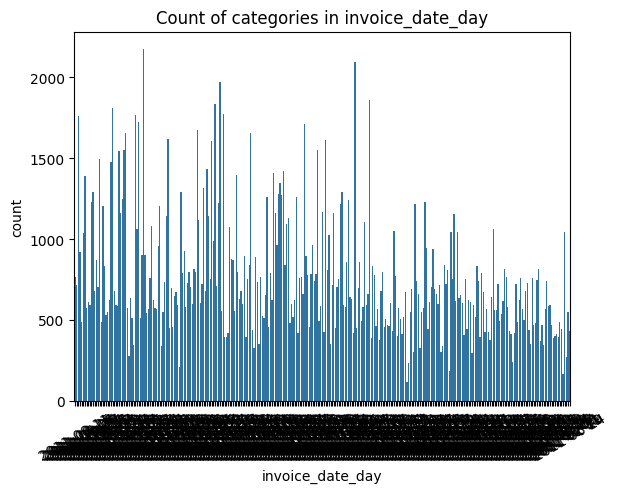

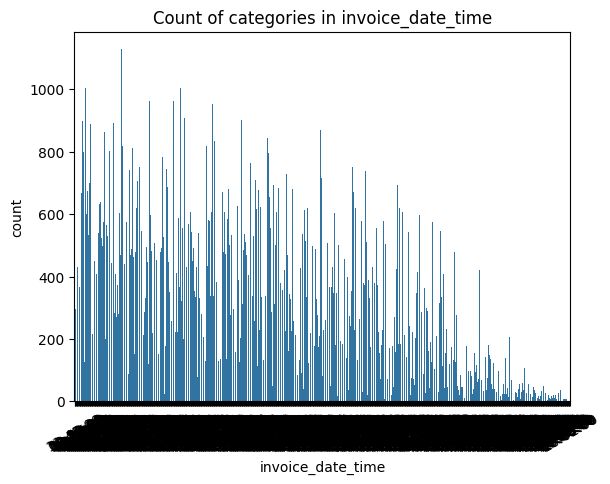

Cannot create countplot. The data type of invoice_year is numeric.
Cannot create countplot. The data type of invoice_month is numeric.


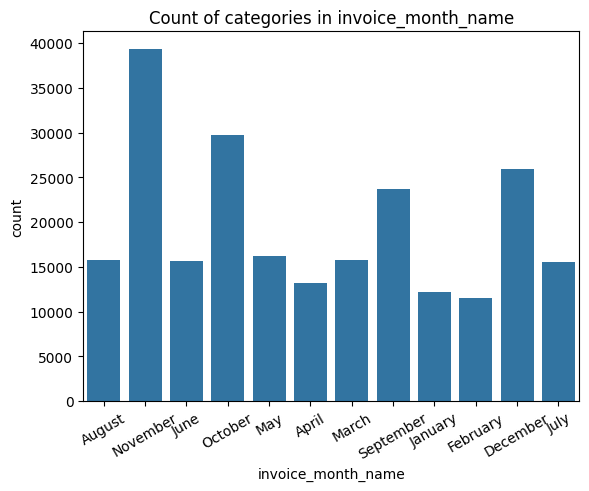

Cannot create countplot. The data type of invoice_day is numeric.


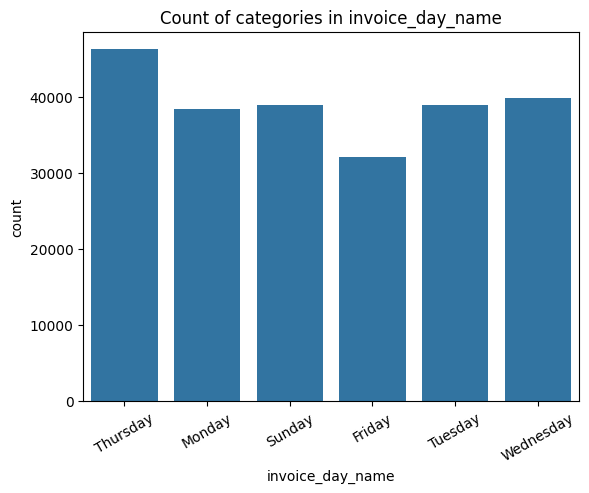

Cannot create countplot. The data type of invoice_day_of_week is numeric.
Cannot create countplot. The data type of invoice_week_of_year is numeric.
Cannot create countplot. The data type of invoice_hour is numeric.


In [27]:
# Loop through each column in the list
for col_name in col:
    # Check if the current column is categorical (non-numeric)
    if train[col_name].dtype.kind not in 'biufc':
        # Create countplot if the data type is non-numeric (categorical)
        plt.figure()
        plt.title(f'Count of categories in {col_name}')
        sns.countplot(data=train, x=col_name)
        plt.xticks(rotation=30)  # Rotate x-axis labels for better readability if needed
        plt.show()
    else:
        print(f"Cannot create countplot. The data type of {col_name} is numeric.")

# how about when scaled?

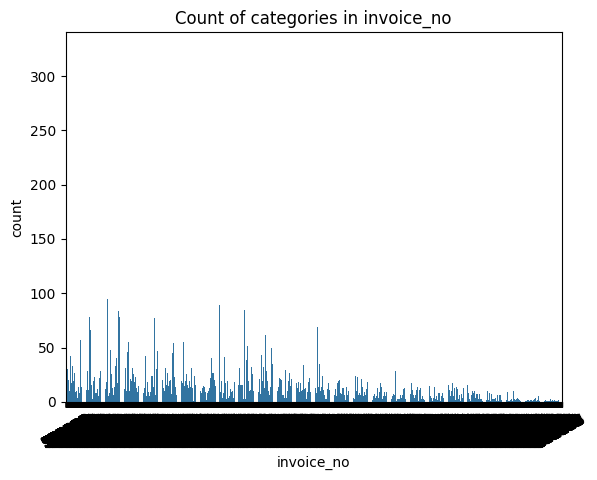

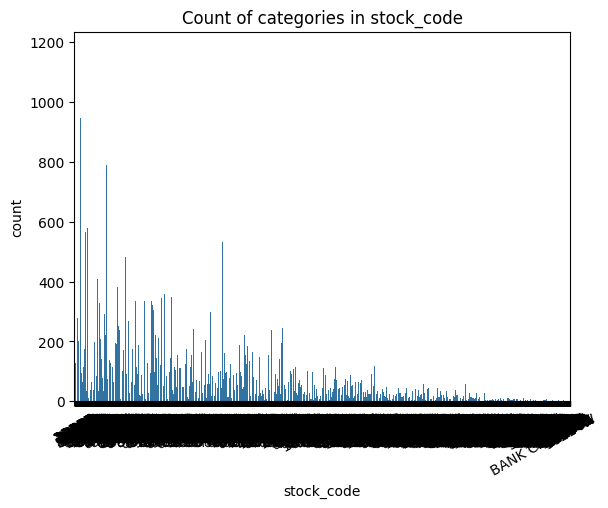

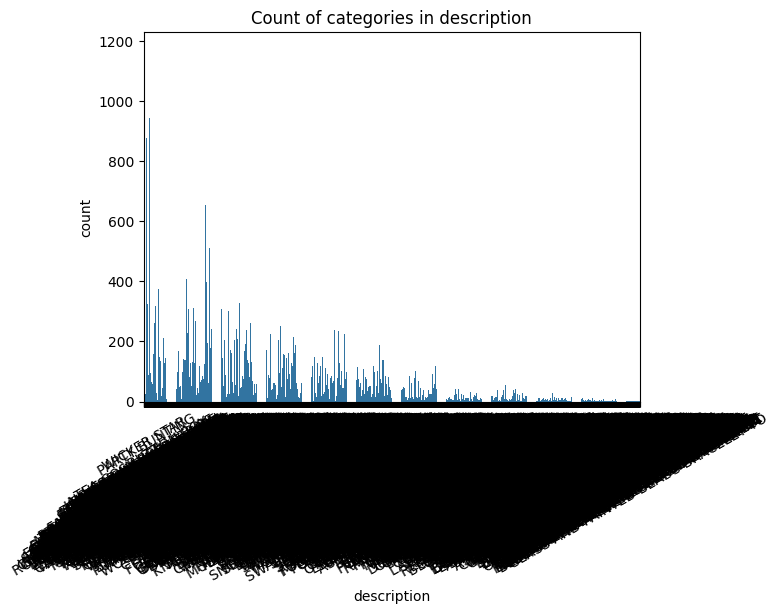

Cannot create countplot. The data type of quantity is numeric.


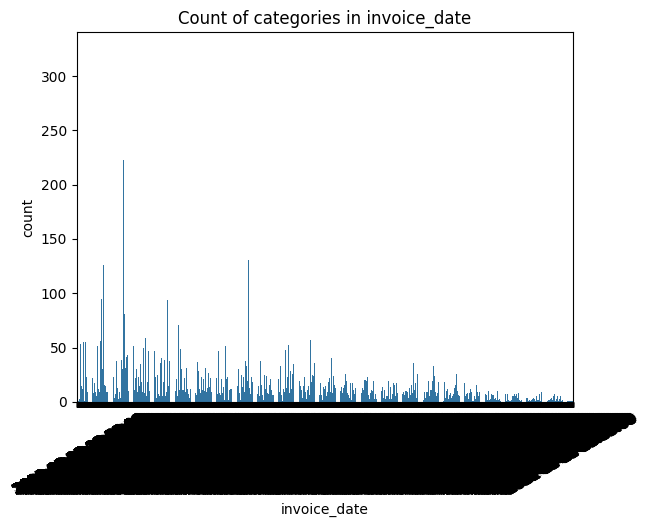

Cannot create countplot. The data type of unit_price is numeric.


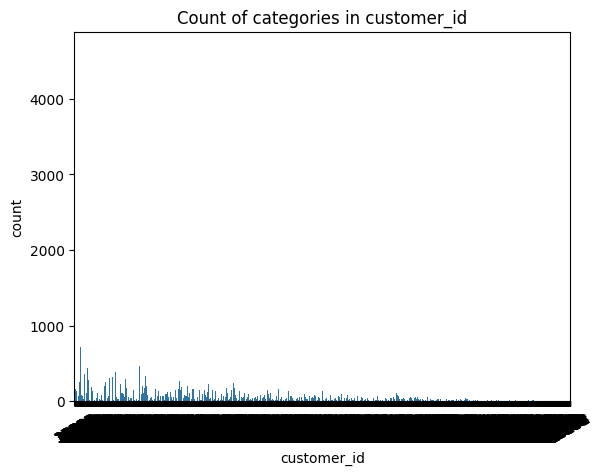

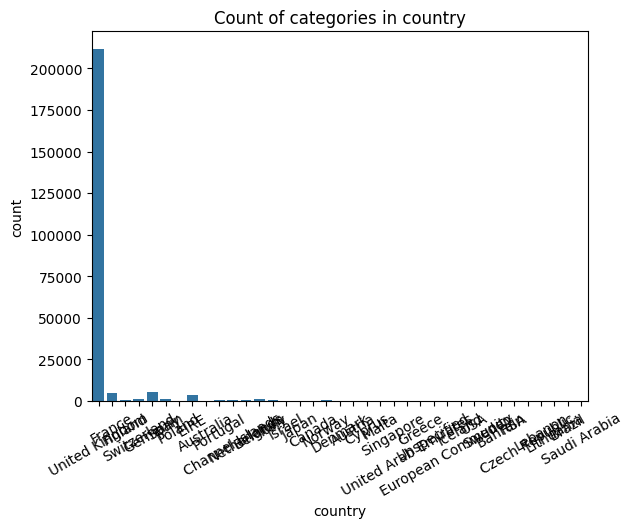

Cannot create countplot. The data type of total_price is numeric.


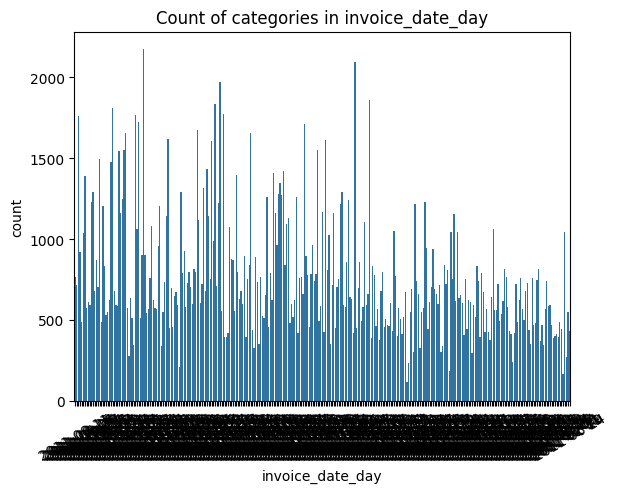

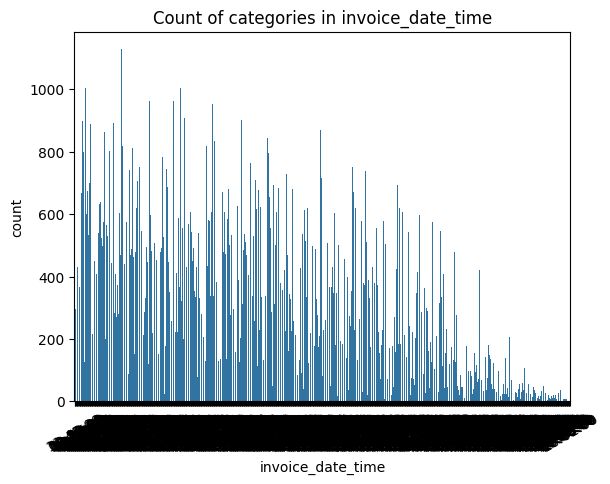

Cannot create countplot. The data type of invoice_year is numeric.
Cannot create countplot. The data type of invoice_month is numeric.


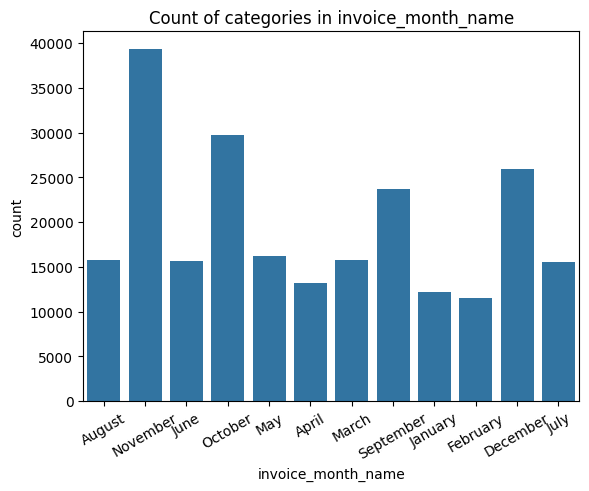

Cannot create countplot. The data type of invoice_day is numeric.


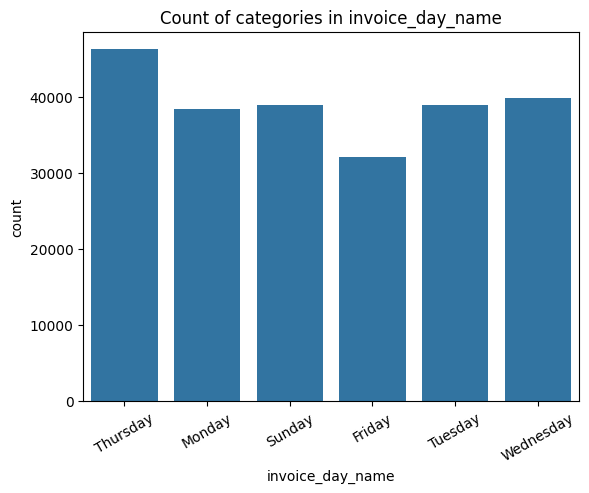

Cannot create countplot. The data type of invoice_day_of_week is numeric.
Cannot create countplot. The data type of invoice_week_of_year is numeric.
Cannot create countplot. The data type of invoice_hour is numeric.


In [64]:
# Loop through each column in the list
for col_name in col:
    # Check if the current column is categorical (non-numeric)
    if train_scaled[col_name].dtype.kind not in 'biufc':
        # Create countplot if the data type is non-numeric (categorical)
        plt.figure()
        plt.title(f'Count of categories in {col_name}')
        sns.countplot(data=train_scaled, x=col_name)
        plt.xticks(rotation=30)  # Rotate x-axis labels for better readability if needed
        plt.show()
    else:
        print(f"Cannot create countplot. The data type of {col_name} is numeric.")

# What is the correlation between all numerical features?

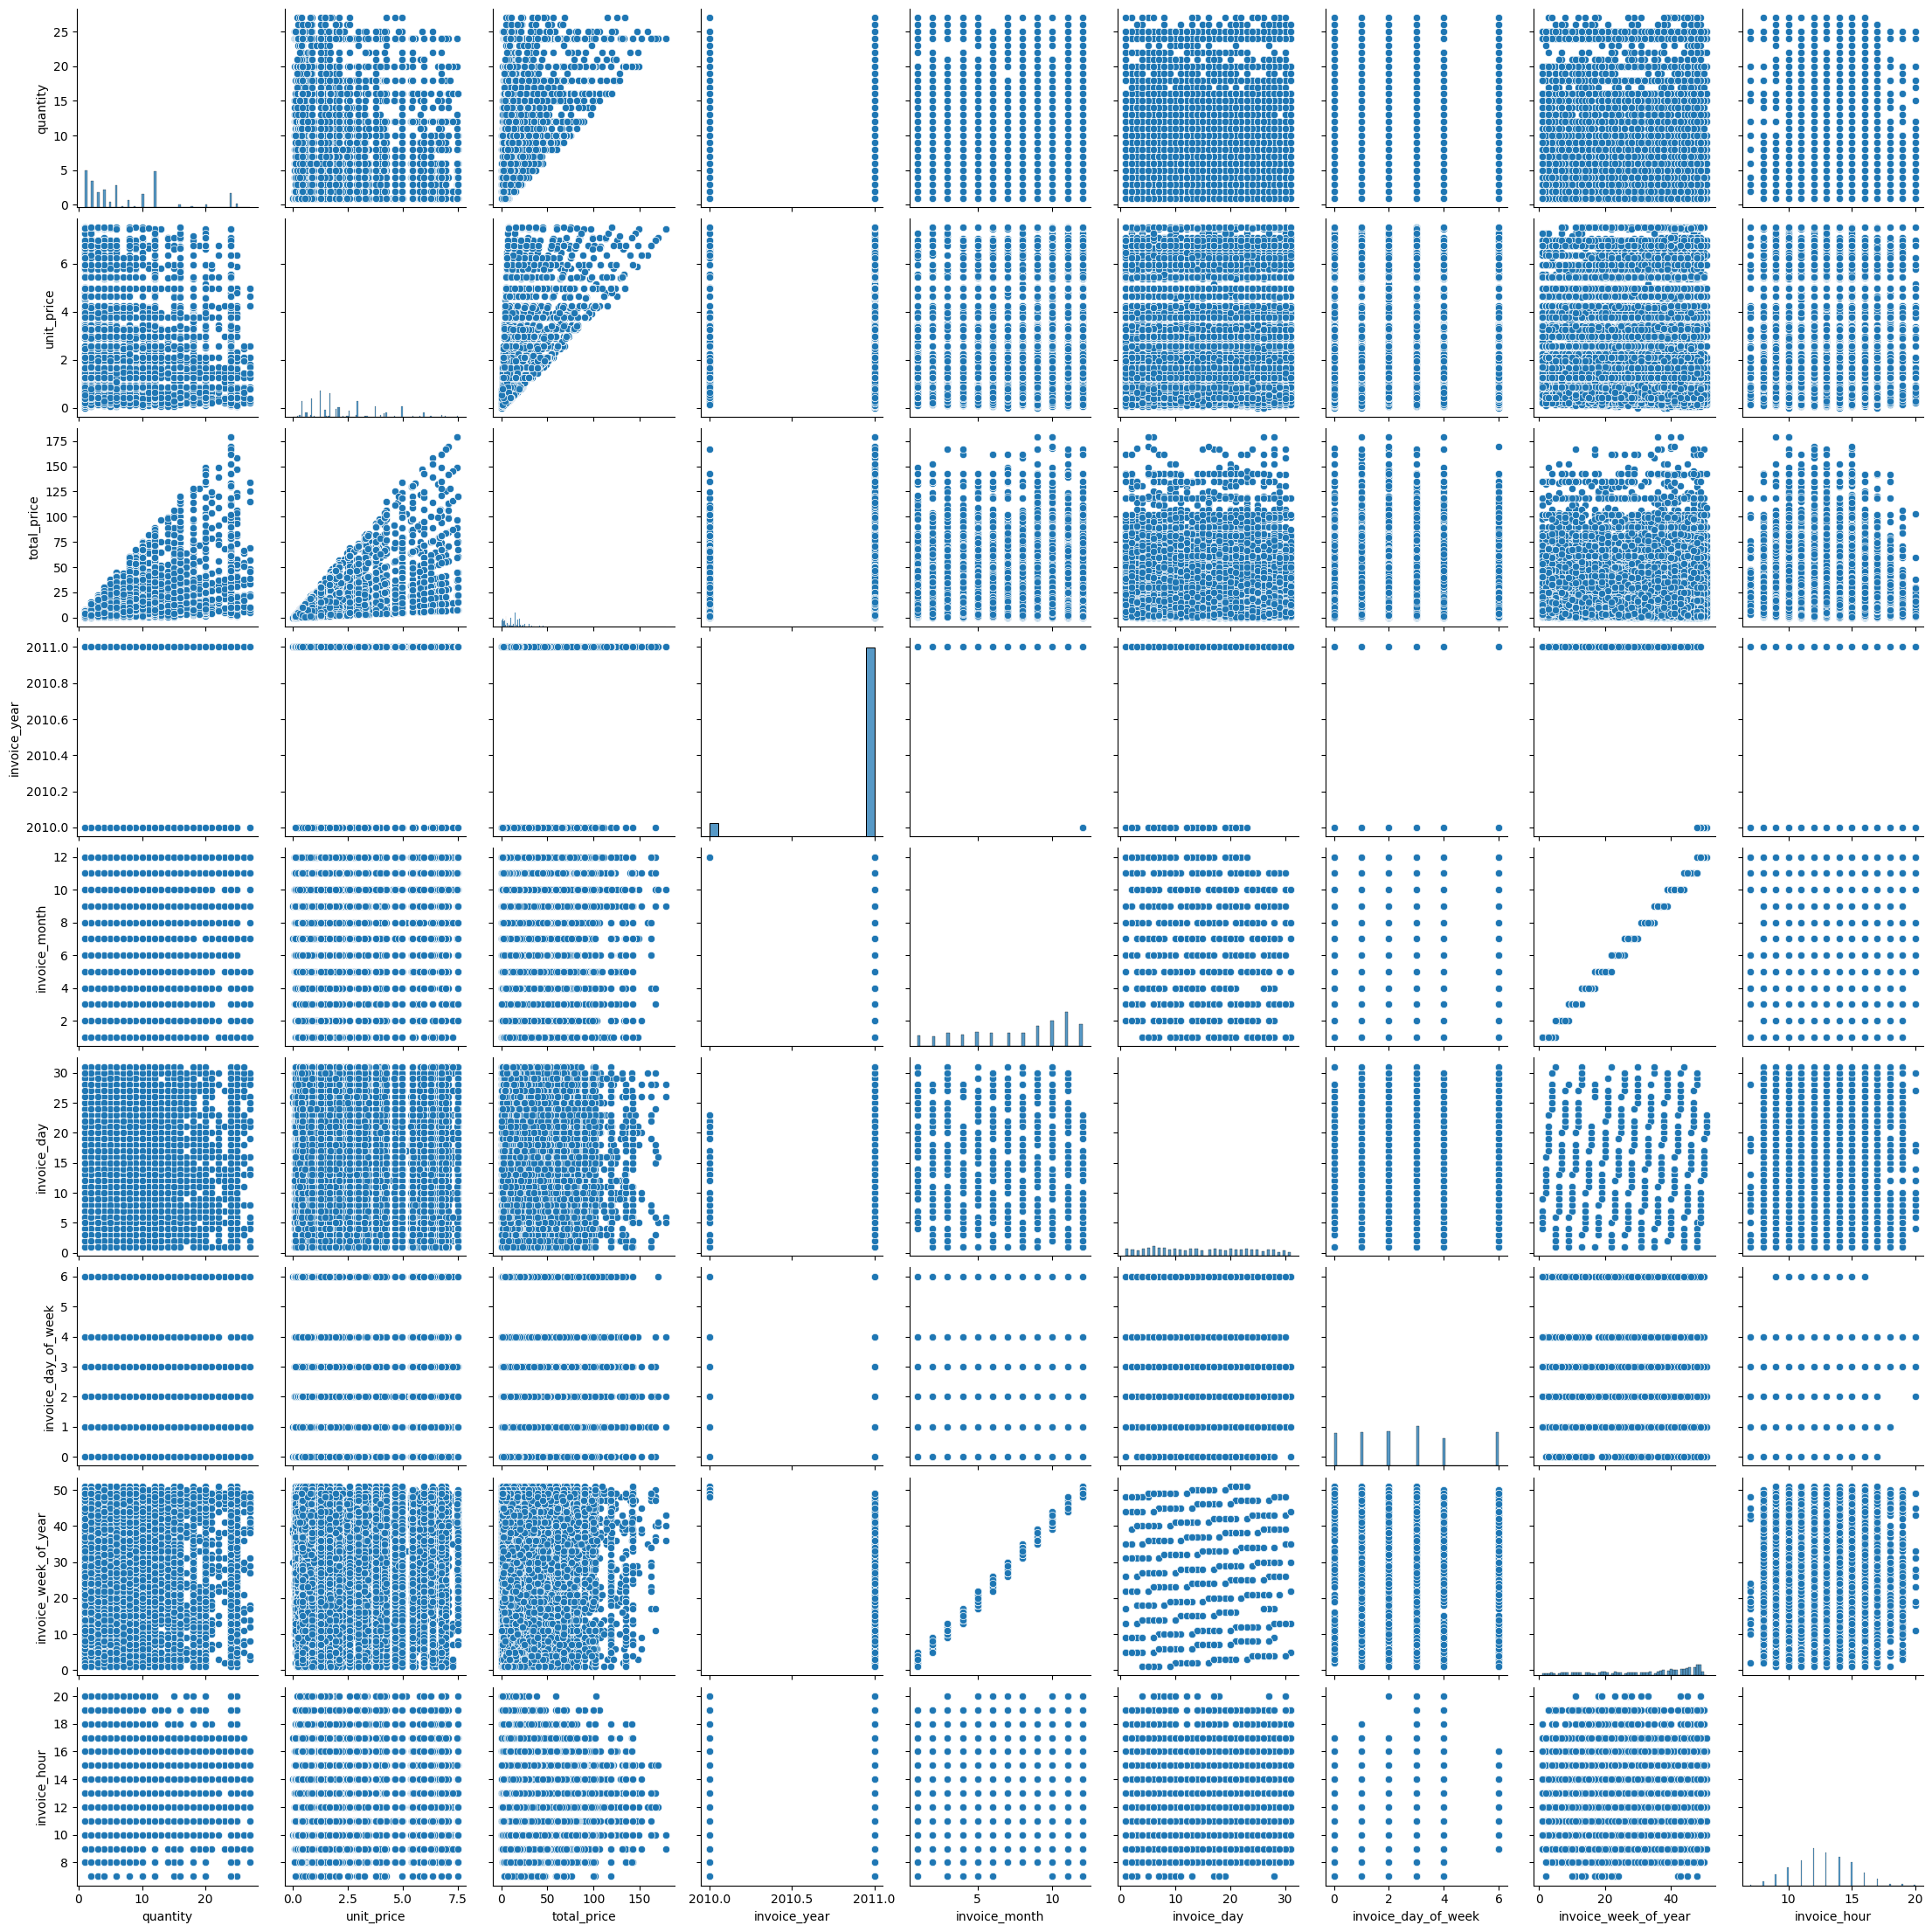

In [28]:
sns.pairplot(data = train, corner=False)

## correlation after scaling...

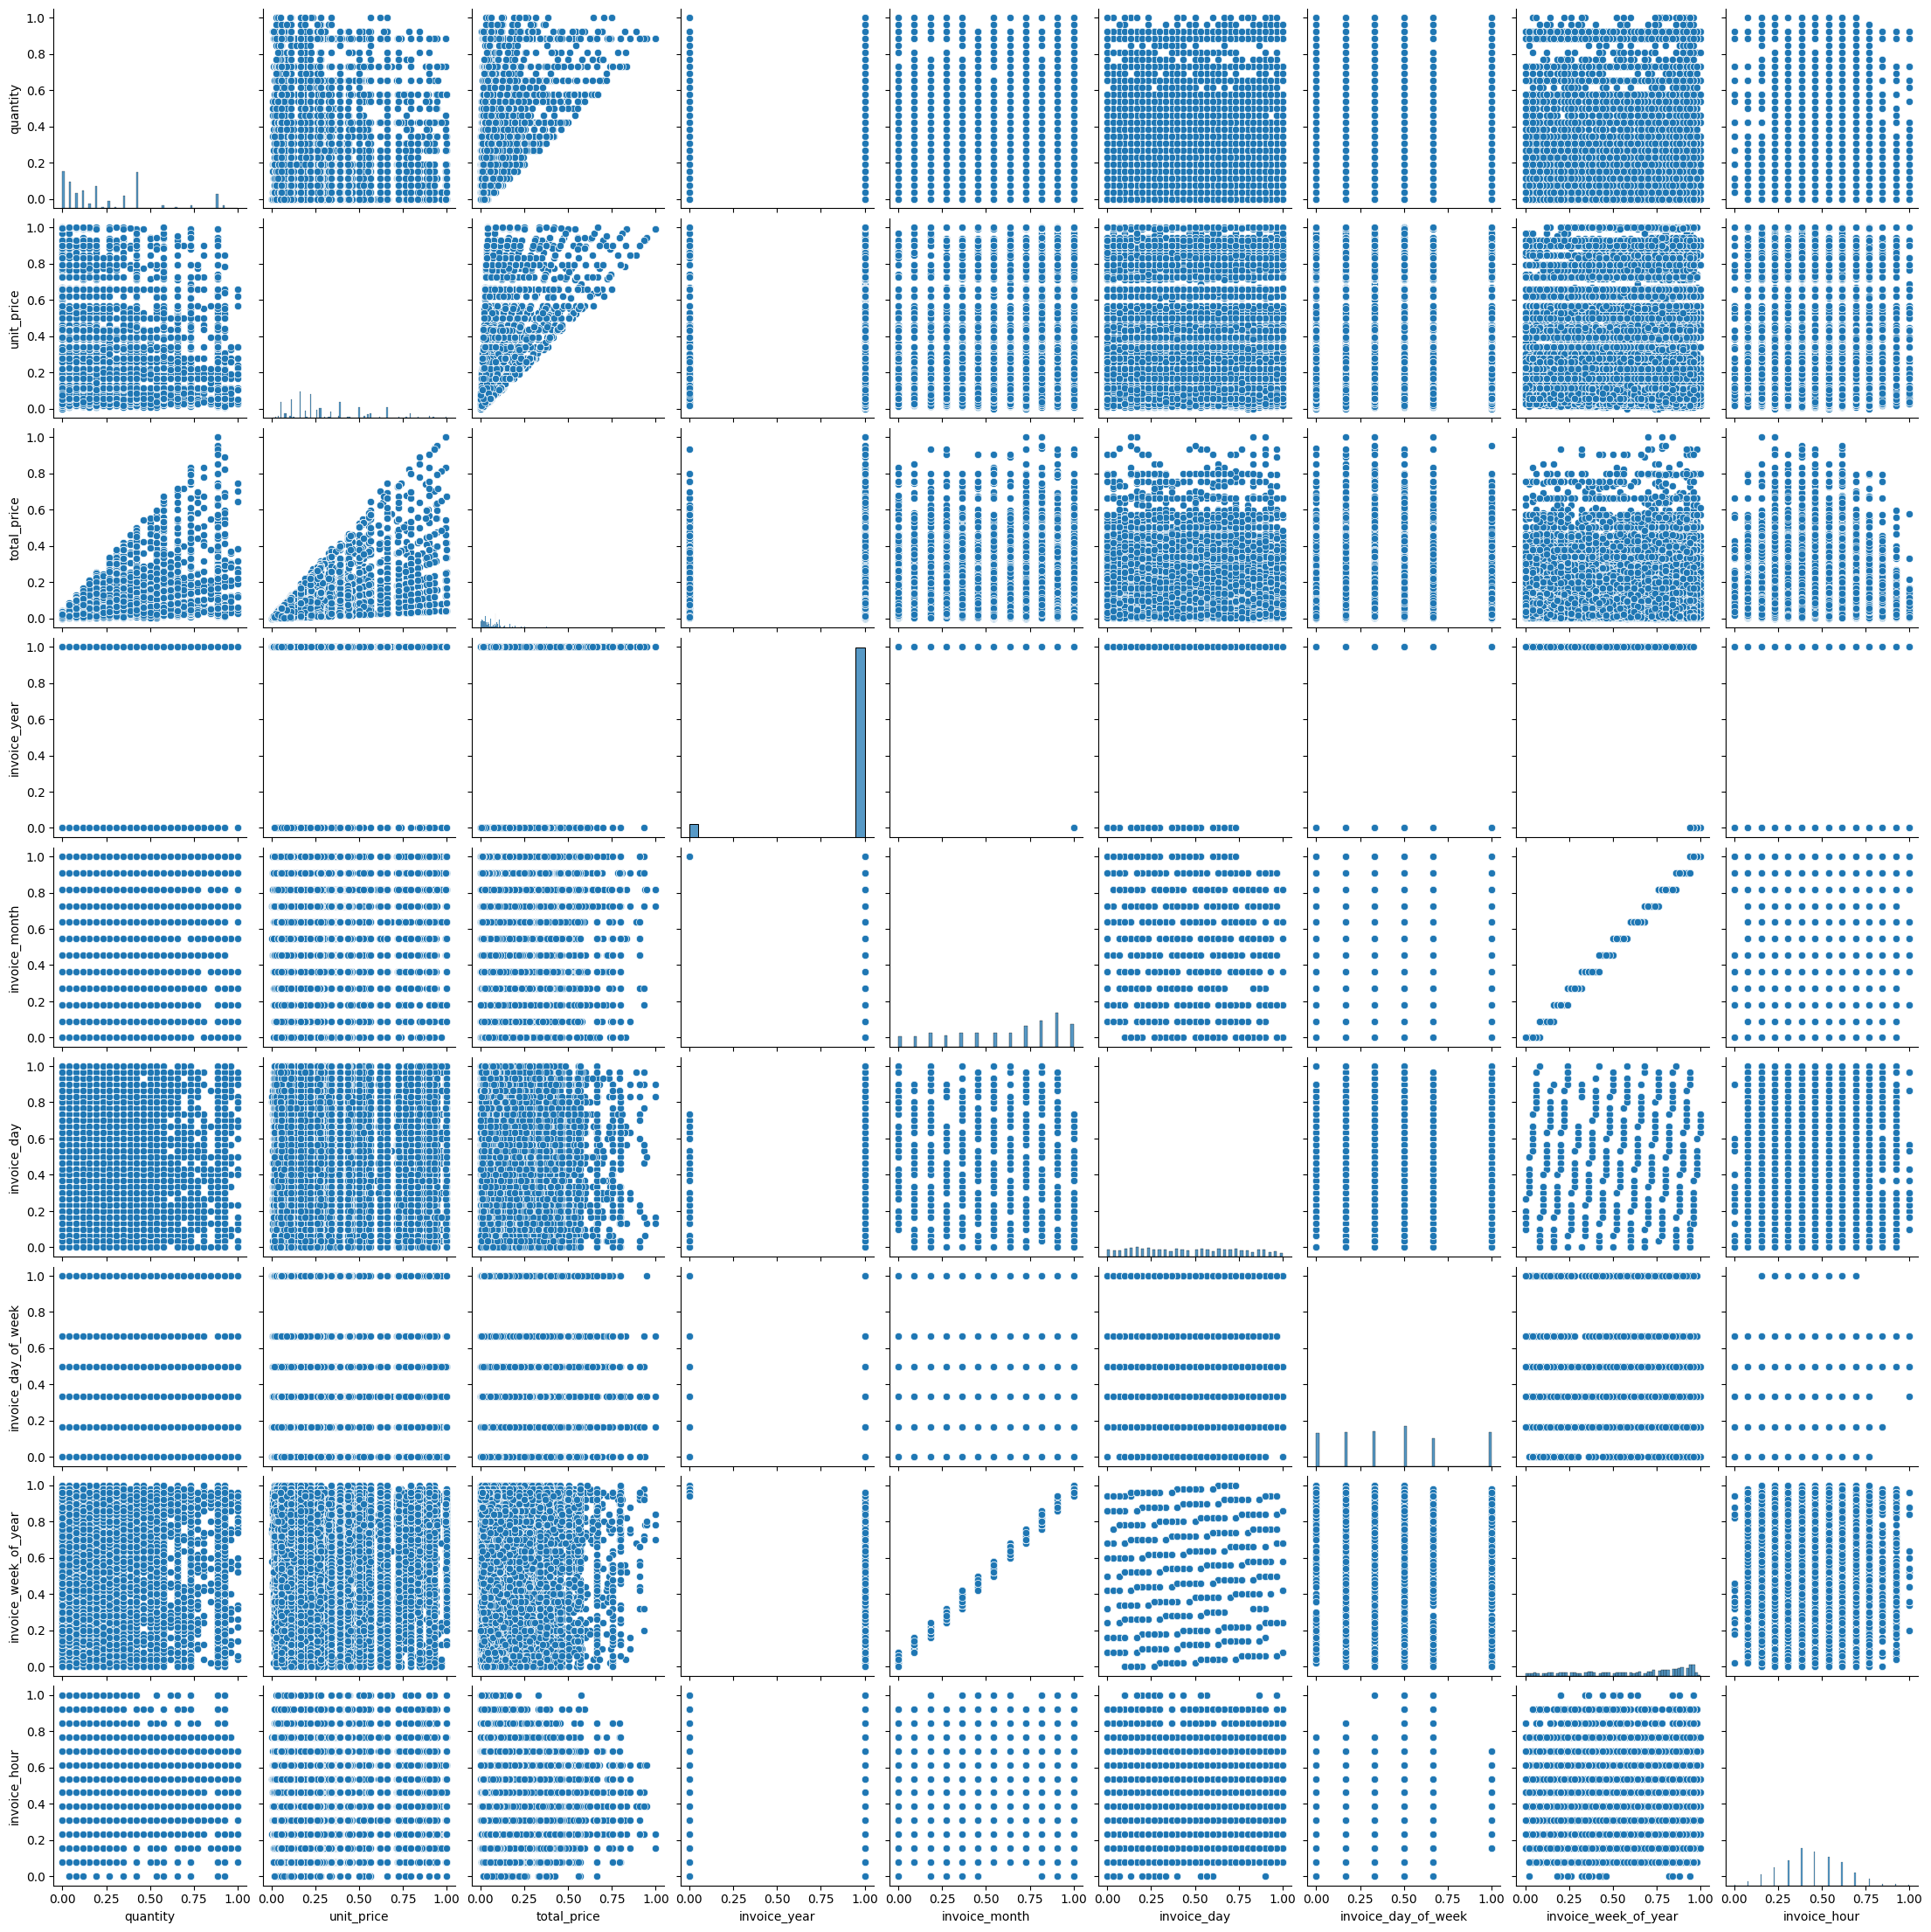

In [66]:
sns.pairplot(data = train_scaled, corner=False)

# what is the `country` count distributions within this data?

In [67]:
country_cnts = train.country.value_counts()
country_cnts = pd.DataFrame(country_cnts).reset_index()
country_cnts = country_cnts[country_cnts['count'] > 1000]

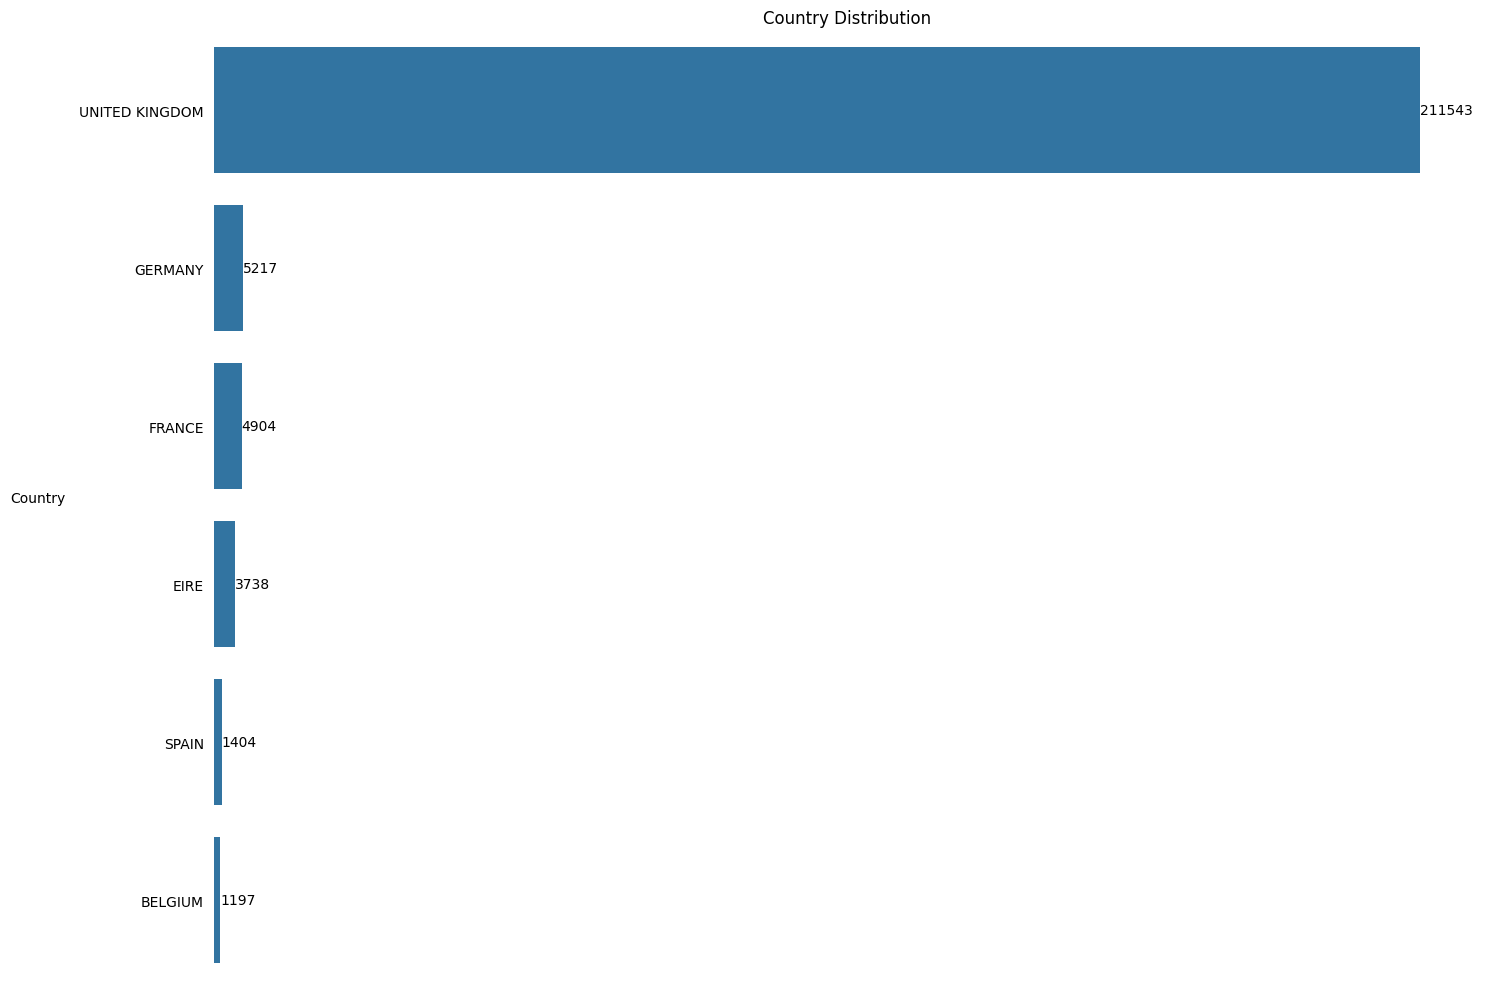

In [30]:
# set figsze
plt.figure(figsize=(15, 10))

# Create the bar plot
ax = sns.barplot(data=country_cnts, x='count', y='country')

# remove spines
sns.despine(left=True, bottom=True)

# adding values at the end of each bar
for p in ax.patches:
    
    ax.annotate(f'{p.get_width():.0f}', (p.get_width(), p.get_y() + p.get_height() / 2),
                ha='left', va='center', fontsize=10, color='black')

# Remove x-tick labels, keeping the ticks
ax.set_xticklabels([])
ax.set_xticks([])

# Remove y ticks
ax.tick_params(axis='y', which='both', left=False)
# ax.tick_params(axis='x', which='both', bottom=False, xlabel=None)

        
# set labels
plt.title('Country Distribution')

# capitalize the y-axis labels
ax.set_yticklabels([label.get_text().upper() for label in ax.get_yticklabels()])

plt.ylabel('Country', rotation=0, labelpad=30)
plt.xlabel('')
plt.tight_layout()
plt.show()

* The data is comprised of alot of infmormation relating to the United Kingdom

In [31]:
train.columns.to_list()

['invoice_no',
 'stock_code',
 'description',
 'quantity',
 'invoice_date',
 'unit_price',
 'customer_id',
 'country',
 'total_price',
 'invoice_date_day',
 'invoice_date_time',
 'invoice_year',
 'invoice_month',
 'invoice_month_name',
 'invoice_day',
 'invoice_day_name',
 'invoice_day_of_week',
 'invoice_week_of_year',
 'invoice_hour']

## How does `quantity` vary with `customer_id`?

<Figure size 1000x600 with 0 Axes>

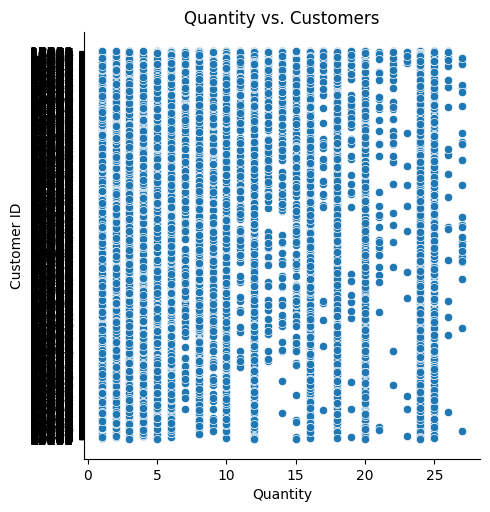

In [32]:
plt.figure(figsize=(10, 6))
sns.relplot(x='quantity', y='customer_id', data=train)
plt.title('Quantity vs. Customers')
plt.xlabel('Quantity')
plt.ylabel('Customer ID')
plt.show()

## how about `unit_price` and `customer_id`?

<Figure size 1000x600 with 0 Axes>

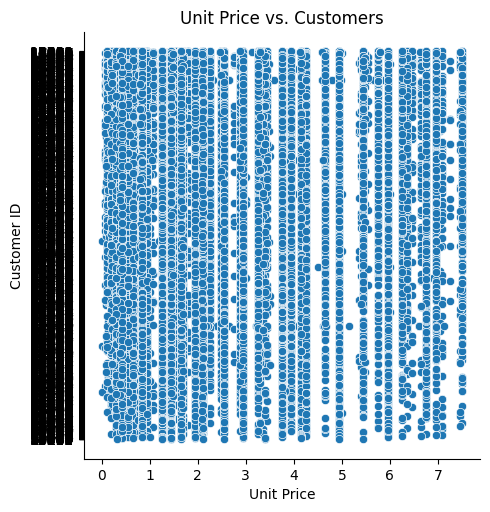

In [33]:
plt.figure(figsize=(10, 6))
sns.relplot(x='unit_price', y='customer_id', data=train)
plt.title('Unit Price vs. Customers')
plt.xlabel('Unit Price')
plt.ylabel('Customer ID')
plt.show()

# Is there a relationship between `total_price` and `quantity`?

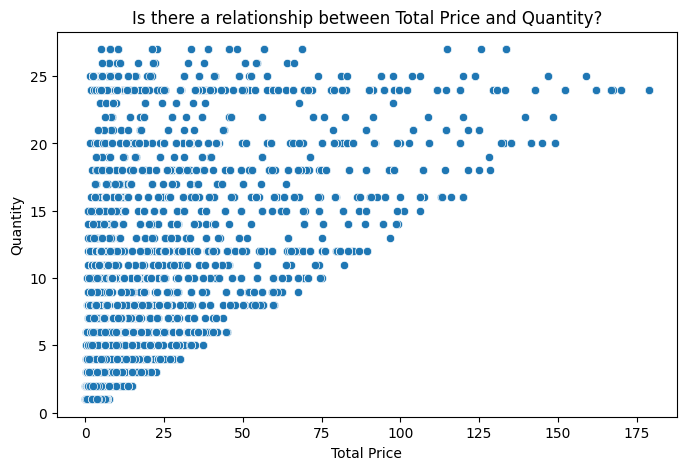

In [34]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='total_price', y='quantity', data=train)
plt.title('Is there a relationship between Total Price and Quantity?')
plt.xlabel('Total Price')
plt.ylabel('Quantity')
plt.show()

# -----------------------------------------------------------------

# -----------------------------------------------------------------

In [35]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 234509 entries, 298159 to 212465
Data columns (total 19 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   invoice_no            234509 non-null  object        
 1   stock_code            234509 non-null  object        
 2   description           234509 non-null  object        
 3   quantity              234509 non-null  int64         
 4   invoice_date          234509 non-null  datetime64[ns]
 5   unit_price            234509 non-null  float64       
 6   customer_id           234509 non-null  object        
 7   country               234509 non-null  object        
 8   total_price           234509 non-null  float64       
 9   invoice_date_day      234509 non-null  object        
 10  invoice_date_time     234509 non-null  object        
 11  invoice_year          234509 non-null  int32         
 12  invoice_month         234509 non-null  int32         
 13 

In [36]:
# Convert ref_date to a pandas Timestamp object
ref_date = pd.Timestamp(df["invoice_date_day"].max()) + timedelta(days=1)

# Calculate Recency, Frequency, and MonetaryValue
recency = df.groupby('customer_id')['invoice_date'].max()
frequency = df.groupby('customer_id')['invoice_no'].count()
monetary_value = df.groupby('customer_id')['total_price'].sum()

# Add these features to the DataFrame
train_customer = pd.DataFrame({
    'Recency': (ref_date - recency).dt.days,  # Calculate recency
    'Frequency': frequency,
    'MonetaryValue': monetary_value
})

# Add quantity and quantity_bin features
train_customer['Quantity'] = df.groupby('customer_id')['quantity'].sum()
# train_customer['QuantityBin'] = pd.cut(train_customer['Quantity'], [0, 10, 20, 30], labels=['0-10', '11-20', '21-30'])

# Optionally, convert categorical features into dummy/indicator variables if needed
train_customer = pd.get_dummies(train_customer)
train_customer = train_customer.astype(int)

In [37]:
train_customer

Recency  Frequency  MonetaryValue  Quantity
customer_id                                             
12347              2        166           3314      1893
12348            248          6             90       140
12349             18         58            999       523
12350            310         16            294       196
12352             36         51            870       362
...              ...        ...            ...       ...
18280            277          8            137        40
18281            180          5             46        52
18282              7          8            113        51
18283              3        752           2051      1393
18287             42         50            960       778

[4188 rows x 4 columns]

In [38]:
train_customer.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4188 entries, 12347 to 18287
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Recency        4188 non-null   int64
 1   Frequency      4188 non-null   int64
 2   MonetaryValue  4188 non-null   int64
 3   Quantity       4188 non-null   int64
dtypes: int64(4)
memory usage: 163.6+ KB


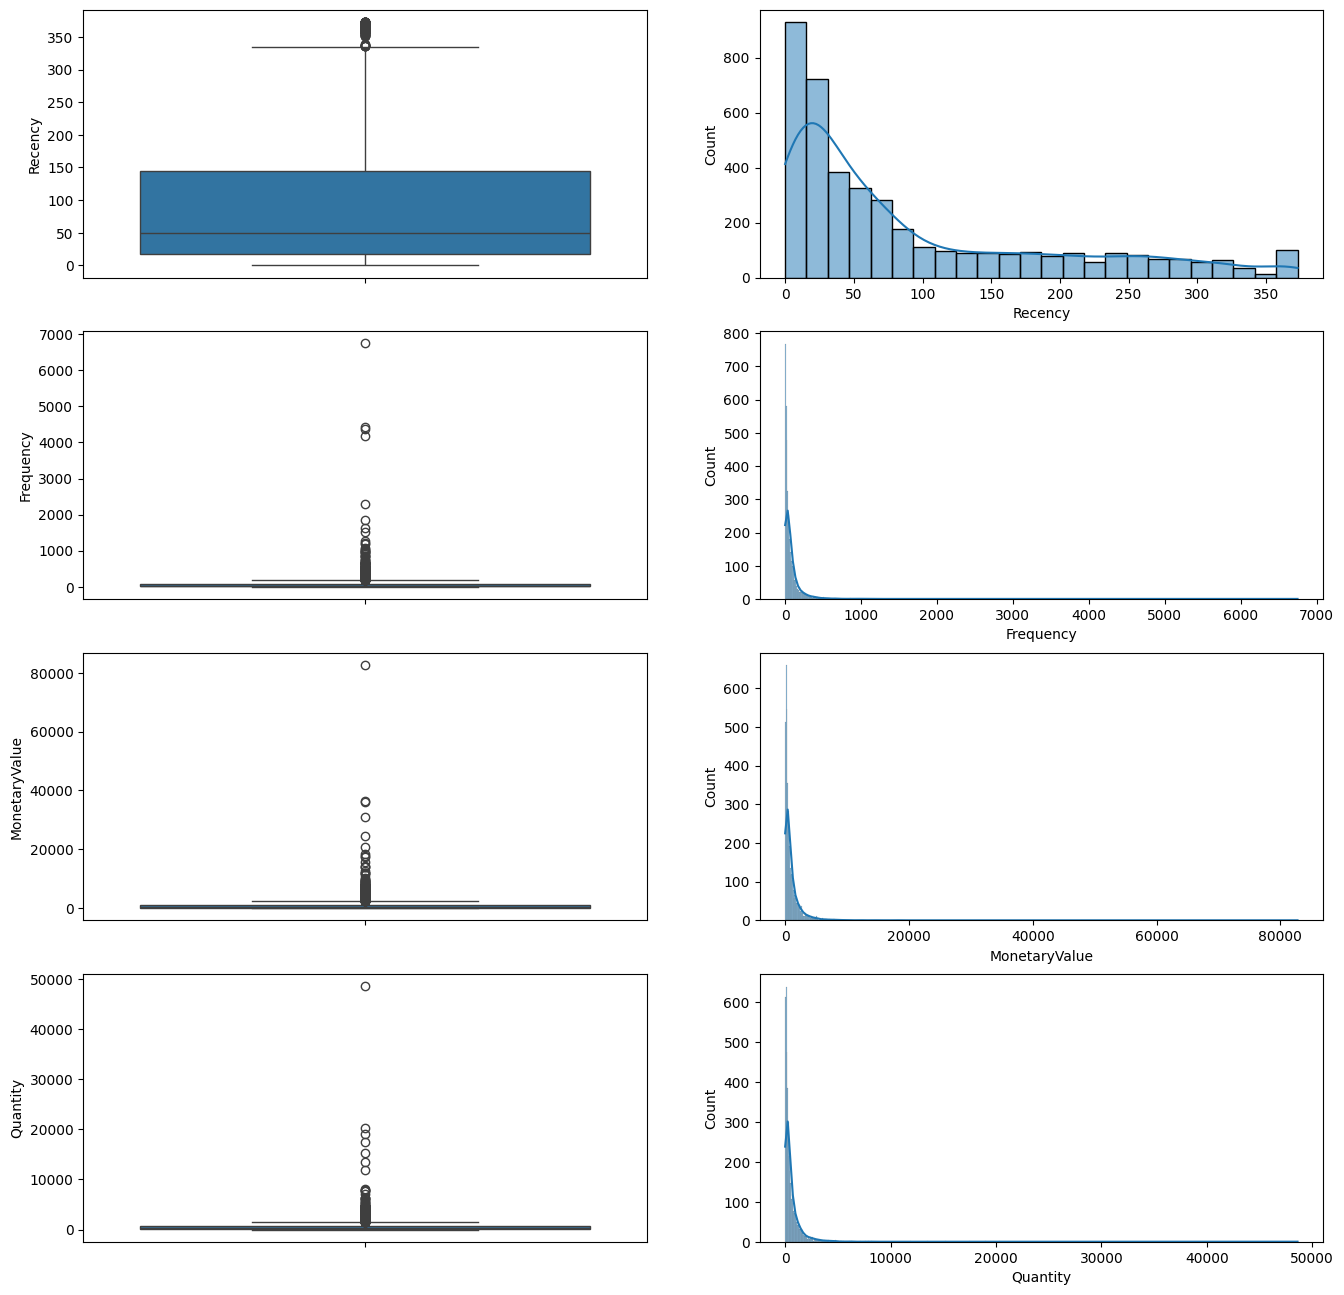

In [39]:
n_cols = len(train_customer.columns)
fig, axes = plt.subplots(n_cols, 2, figsize=(16, n_cols * 4))

for i, col in enumerate(train_customer.columns):
    sns.boxplot(data=train_customer, y=col, ax=axes[i][0])
    sns.histplot(data=train_customer, x=col, kde=True, ax=axes[i][1])

fig.show()

In [40]:
def remove_outliers(df, col, threshold=1.5):
    Q1 = np.quantile(df[col], .25)
    Q3 = np.quantile(df[col], .75)
    IQR = Q3 - Q1
    df.drop(df[(df[col] < (Q1 - threshold * IQR)) | (df[col] > (Q3 + threshold * IQR))].index, axis=0, inplace=True)
    
    return df

In [41]:
for col in train_customer.columns:
    size_before = len(train_customer)
    train_customer = remove_outliers(train_customer, col)
    print(f"Removed {size_before - len(train_customer)} outliers from {col}")

Removed 124 outliers from Recency
Removed 353 outliers from Frequency
Removed 289 outliers from MonetaryValue
Removed 151 outliers from Quantity


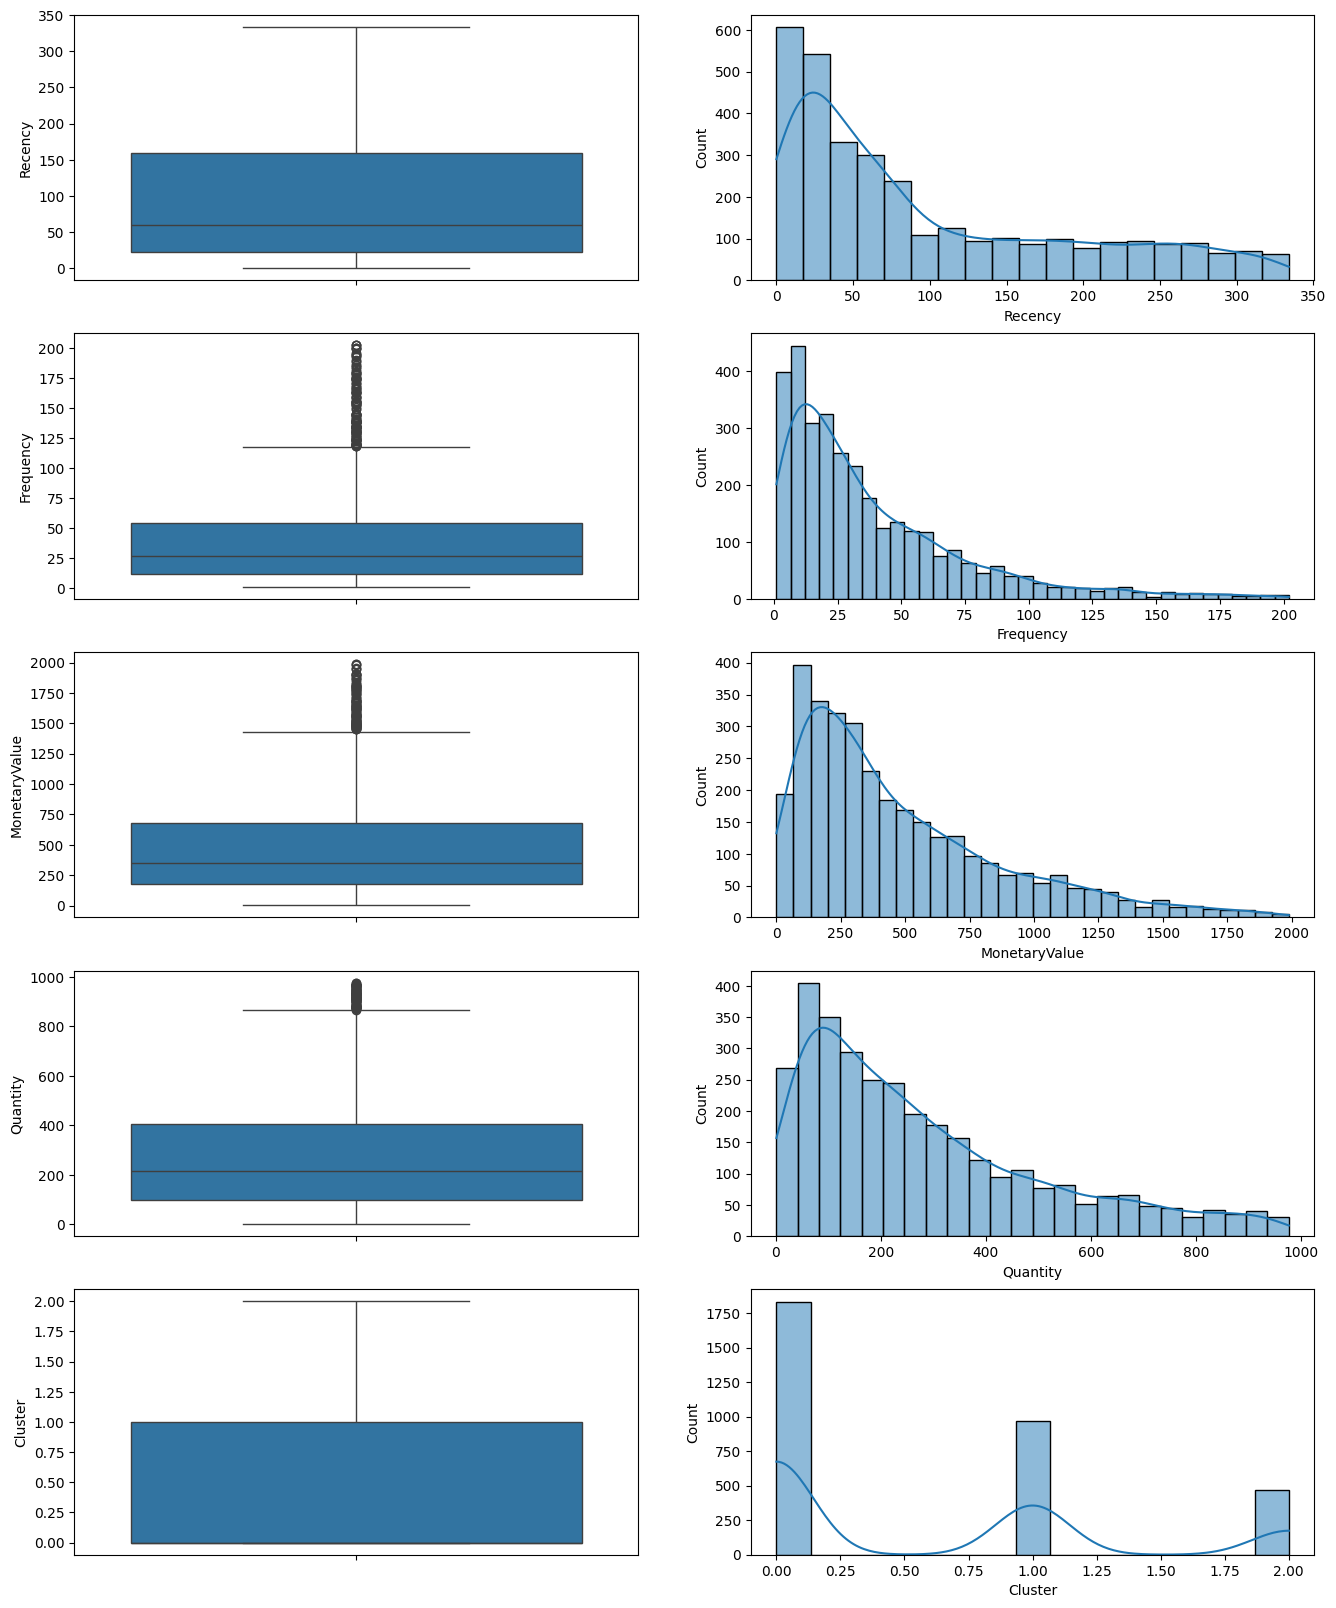

In [89]:
n_cols = len(train_customer.columns)
fig, axes = plt.subplots(n_cols, 2, figsize=(16, n_cols * 4))

for i, col in enumerate(train_customer.columns):
    sns.boxplot(data=train_customer, y=col, ax=axes[i][0])
    sns.histplot(data=train_customer, x=col, kde=True, ax=axes[i][1])

fig.show()

In [97]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(train_customer)

# Assign cluster labels to each customer
train_customer['Cluster'] = kmeans.labels_

# Analyze the clusters
cluster_analysis = train_customer.groupby('Cluster').mean()

In [45]:
cluster_analysis

Recency  Frequency  MonetaryValue    Quantity
Cluster                                                  
0         71.633441  58.573955     670.684887  405.702572
1        137.570220  13.686125     138.354484   79.306261
2         51.277778  89.635802    1572.024691  817.629630
3         50.081794  71.709763    1063.150396  634.192612
4         93.068035  34.416847     365.940605  226.326134

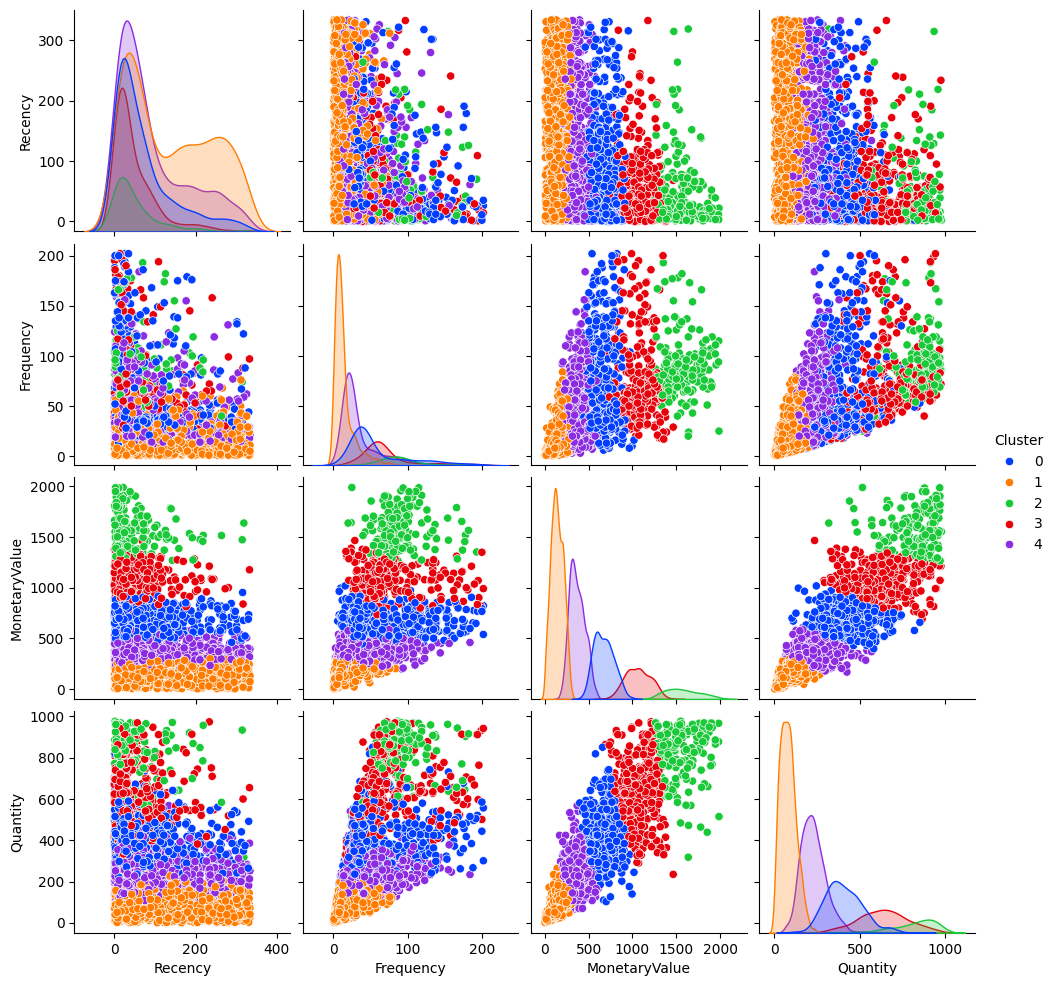

In [46]:
# Add the cluster labels to the DataFrame for visualization
train_customer['Cluster'] = kmeans.labels_

# Select features for pairplot (excluding Cluster)
features = [col for col in train_customer.columns if col != 'Cluster']

# Create pairplot
sns.pairplot(train_customer, hue='Cluster', vars=features, palette='bright')
plt.show()

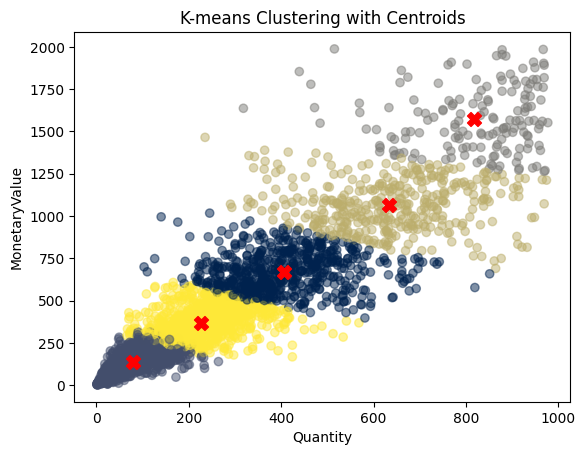

In [99]:

# Scatter plot of the data points with cluster assignments
plt.scatter(train_customer['Quantity'], train_customer['MonetaryValue'], c=train_customer['Cluster'], cmap='cividis', alpha=0.5)

# Scatter plot of the centroids
plt.scatter(cluster_analysis['Quantity'], cluster_analysis['MonetaryValue'], c='red', marker='X', s=100)

# Set labels and title
plt.xlabel('Quantity')
plt.ylabel('MonetaryValue')
plt.title('K-means Clustering with Centroids')

# Show plot
plt.show()


# Here we are checking the change in inertia as cluster number increases

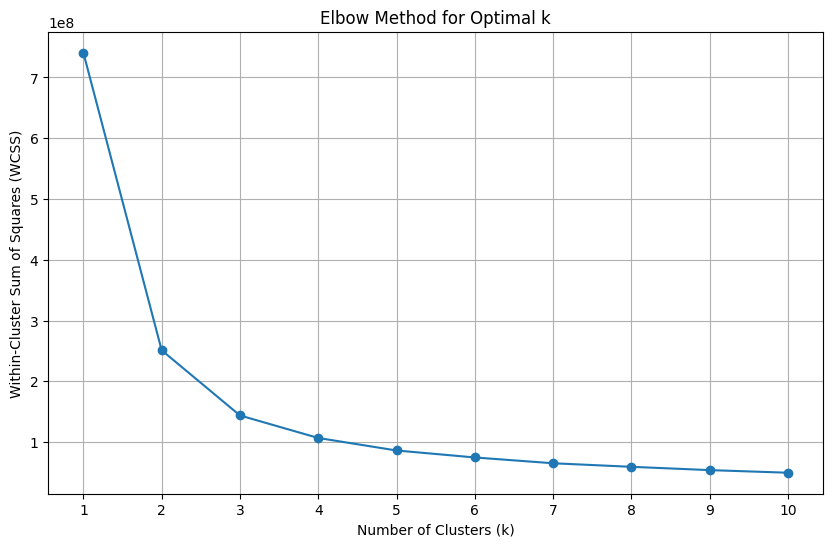

In [47]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Define the range of clusters to test
k_values = range(1, 11)
wcss = []  # Within-cluster sum of squares

# Calculate WCSS for each value of k
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(train_customer)
    wcss.append(kmeans.inertia_)

# Plot the elbow plot
plt.figure(figsize=(10, 6))
plt.plot(k_values, wcss, marker='o', linestyle='-')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.xticks(k_values)
plt.grid(True)
plt.show()


# It seems to drop off after 3, so the optimal k is 3.

In [80]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(train_customer)

# Assign cluster labels to each customer
train_customer['Cluster'] = kmeans.labels_

# Analyze the clusters
cluster_analysis = train_customer.groupby('Cluster').mean()

In [72]:
cluster_analysis

Recency  Frequency  MonetaryValue    Quantity
Cluster                                                  
0        124.777171  19.832878     203.946477  122.499727
1         71.020661  54.453512     627.702479  382.063017
2         49.614407  78.716102    1262.970339  708.360169

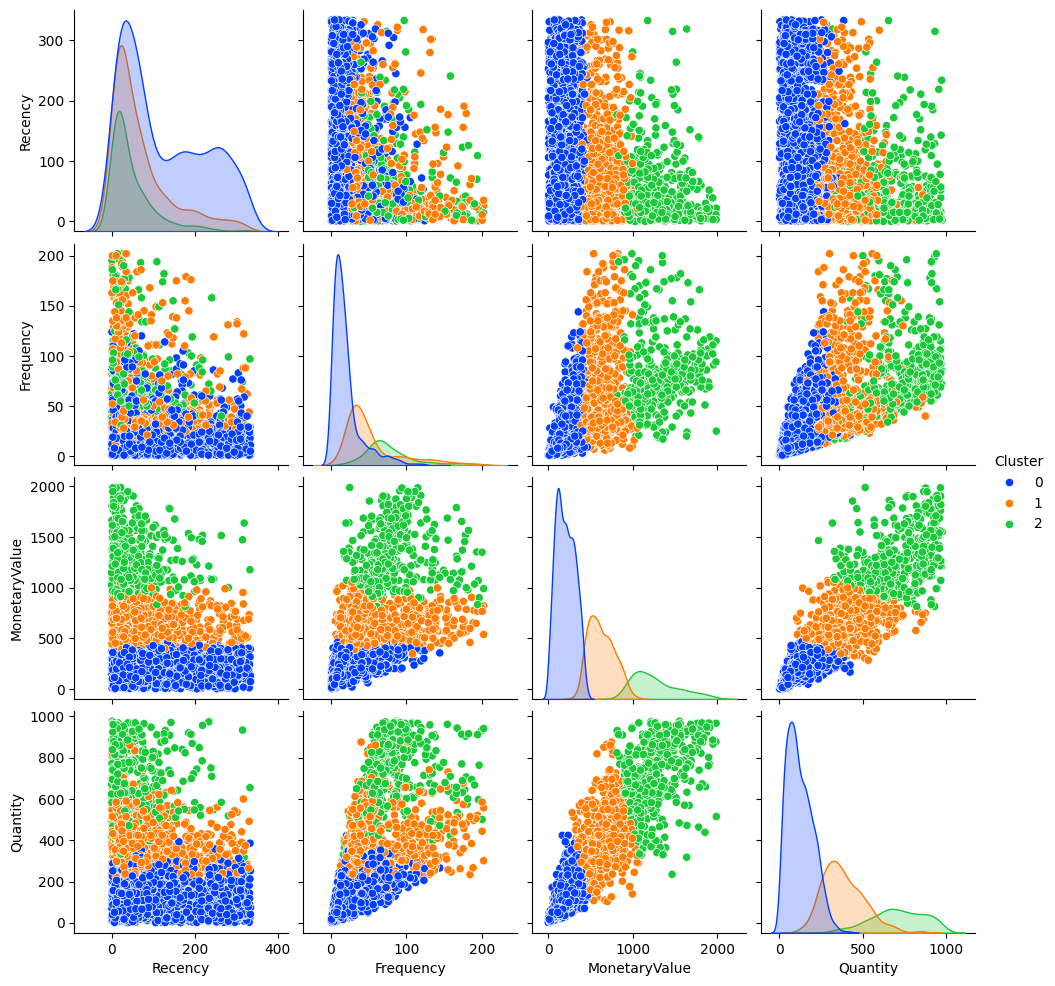

In [50]:
# Add the cluster labels to the DataFrame for visualization
train_customer['Cluster'] = kmeans.labels_

# Select features for pairplot (excluding Cluster)
features = [col for col in train_customer.columns if col != 'Cluster']

# Create pairplot
sns.pairplot(train_customer, hue='Cluster', vars=features, palette='bright')
plt.show()

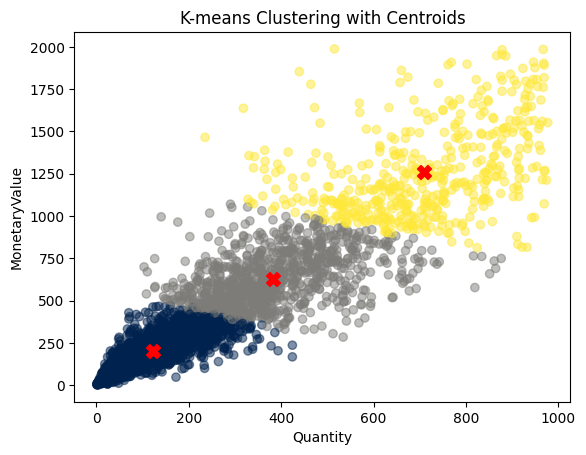

In [96]:

# Scatter plot of the data points with cluster assignments
plt.scatter(train_customer['Quantity'], train_customer['MonetaryValue'], c=train_customer['Cluster'], cmap='cividis', alpha=0.5)

# Scatter plot of the centroids
plt.scatter(cluster_analysis['Quantity'], cluster_analysis['MonetaryValue'], c='red', marker='X', s=100)

# Set labels and title
plt.xlabel('Quantity')
plt.ylabel('MonetaryValue')
plt.title('K-means Clustering with Centroids')

# Show plot
plt.show()


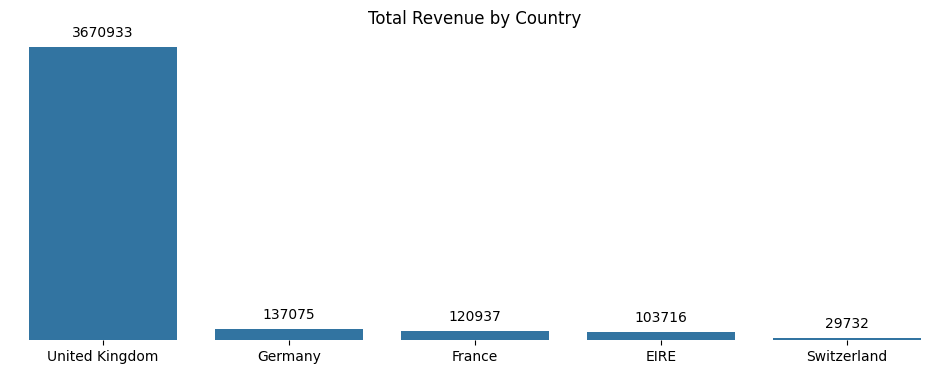

In [51]:
# Calculate total revenue by country and sort in descending order
country_revenue = df.groupby("country")["total_price"].sum().sort_values(ascending=False).reset_index()

# Select only the top 5 countries
top_5_countries = country_revenue.head(5)

plt.figure(figsize=(12, 4))
plt.title("Total Revenue by Country")

# Use seaborn's barplot
ax = sns.barplot(data=top_5_countries, x="country", y="total_price")

# Add numerical values at the top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Remove spines
sns.despine(bottom=True, left=True)

# Remove y-tick labels and tick marks
ax.set_yticklabels([])
ax.tick_params(axis='y', length=0)

plt.ylabel("")
plt.xticks(rotation=0)
plt.xlabel("")
plt.show()


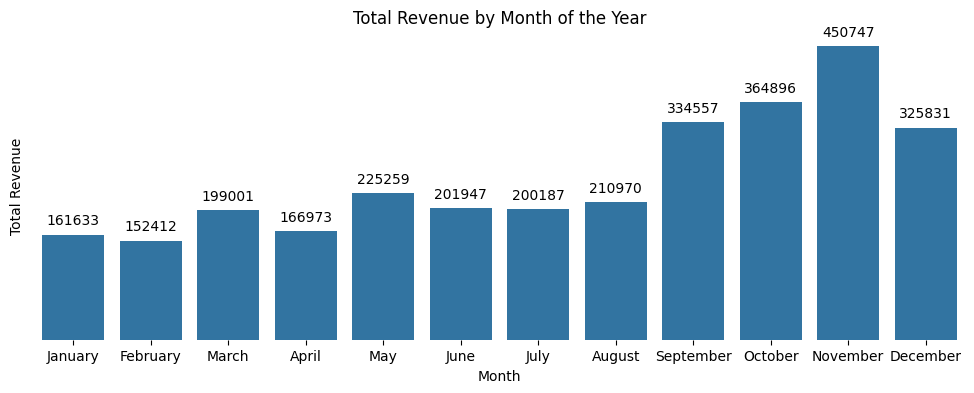

In [52]:
revenue_month = train.groupby(["invoice_month", "invoice_month_name"])["total_price"].sum().reset_index()

plt.figure(figsize=(12, 4))
plt.title("Total Revenue by Month of the Year")

# Use seaborn's barplot
ax = sns.barplot(data=revenue_month, x="invoice_month_name", y="total_price")

# Add numerical values at the top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Remove spines
sns.despine(bottom=True, left=True)

# Remove y-tick labels and tick marks
ax.set_yticklabels([])
ax.tick_params(axis='y', length=0)

plt.xlabel("Month")
plt.ylabel("Total Revenue")
plt.show()

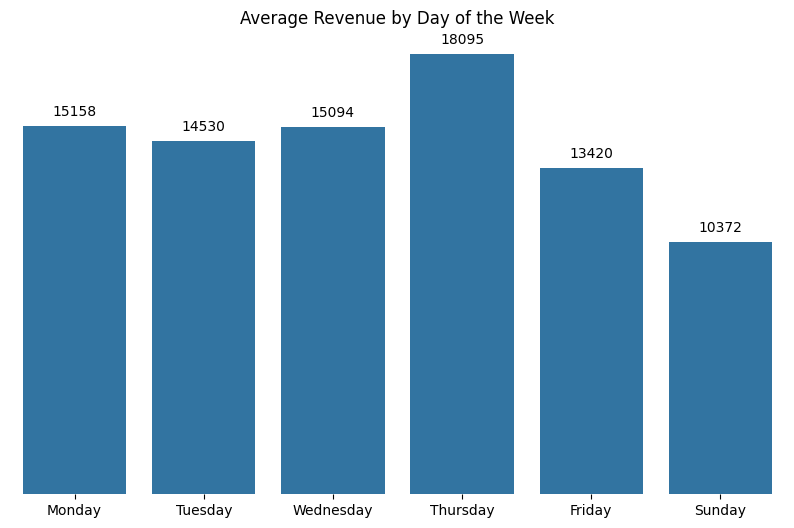

In [53]:
#calculate and plot average revenue by day of the week
revenue_day = df.groupby(["invoice_week_of_year", "invoice_day_of_week", "invoice_day_name"])["total_price"].sum().reset_index()
average_revenue = revenue_day.groupby(["invoice_day_of_week", "invoice_day_name"])["total_price"].mean().reset_index()

plt.figure(figsize=(10, 6))
plt.title("Average Revenue by Day of the Week")

# Use seaborn's barplot
ax = sns.barplot(data=average_revenue, x="invoice_day_name", y="total_price")

# Add numerical values at the top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Remove spines
sns.despine(bottom=True, left=True)

# Remove y-tick labels and tick marks
ax.set_yticklabels([])
ax.tick_params(axis='y', length=0)

plt.xlabel("")
plt.ylabel("")
plt.show()


In [54]:
top_ten_customers = df_customers["MonetaryValue"].sort_values(ascending=False).head(10)
top_ten_customers

customer_id
14911    82772.74
13089    36330.63
14096    36019.84
17841    30962.39
14298    24387.53
12748    20835.27
14156    18300.66
13081    17849.33
15311    17472.11
14088    15700.62
Name: MonetaryValue, dtype: float64

In [ ]:
#Customers Recency

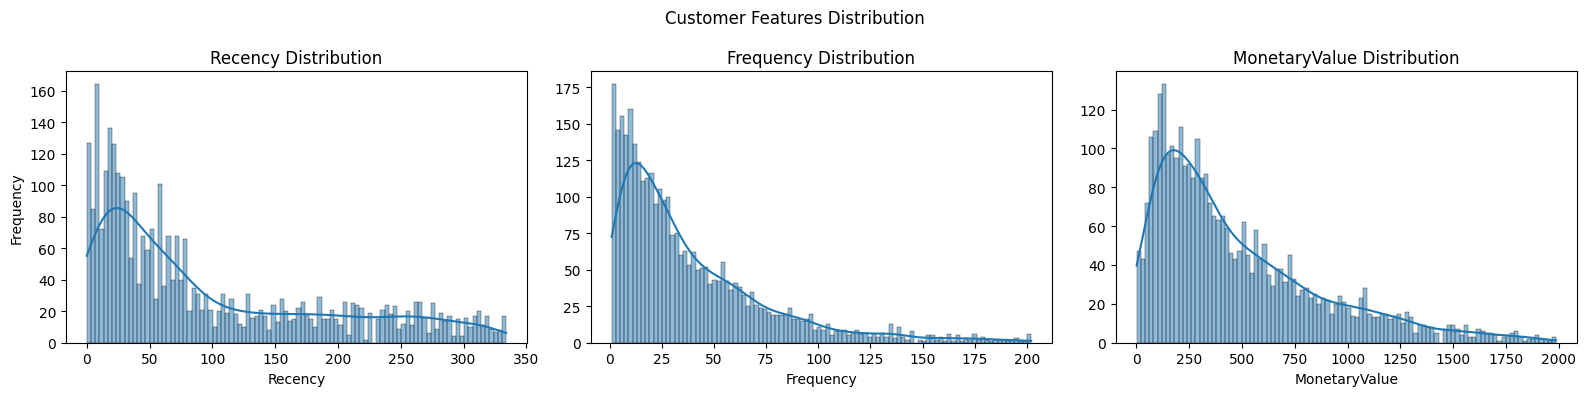

In [105]:
fig, ax = plt.subplots(1, 3, figsize=(16, 4))
fig.suptitle("Customer Features Distribution")

# Plot Recency distribution
sns.histplot(train_customer["Recency"], bins=100, ax=ax[0], kde=True)
ax[0].set_title("Recency Distribution")
ax[0].set_xlabel("Recency")
ax[0].set_ylabel("Frequency")

# Plot Frequency distribution
sns.histplot(train_customer["Frequency"], bins=100, ax=ax[1], kde=True)
ax[1].set_title("Frequency Distribution")
ax[1].set_xlabel("Frequency")
ax[1].set_ylabel("")

# Plot MonetaryValue distribution
sns.histplot(train_customer["MonetaryValue"], bins=100, ax=ax[2], kde=True)
ax[2].set_title("MonetaryValue Distribution")
ax[2].set_xlabel("MonetaryValue")
ax[2].set_ylabel("")

plt.tight_layout()
plt.show()


In [100]:
X = train_customer
X.shape

(3271, 5)

In [101]:
# Check for negative values in train_customer DataFrame
negative_values = (X < 0).any()

# Print columns with negative values, if any
if negative_values.any():
    print("Columns with negative values:")
    print(X.columns[X.min() < 0])
else:
    print("No negative values found.")


No negative values found.


In [102]:
# Define transformers for Box-Cox and Yeo-Johnson transformations
boxcox_t = PowerTransformer(method="box-cox")
yeojohnson_t = PowerTransformer(method="yeo-johnson")
log_t = FunctionTransformer(func=np.log, inverse_func=np.exp)
sqrt_t = FunctionTransformer(func=np.sqrt, inverse_func=lambda x : x ** 2)
cbrt_t = FunctionTransformer(func=np.cbrt, inverse_func=lambda x : x ** 3)

# Apply transformations
X_boxcox = boxcox_t.fit_transform(X)
X_yeojohnson = yeojohnson_t.fit_transform(X)
X_log = log_t.fit_transform(X).values
X_sqrt = sqrt_t.fit_transform(X).values
X_cbrt = cbrt_t.fit_transform(X).values

ValueError: The Box-Cox transformation can only be applied to strictly positive data